# 4 Pre-Processing and Training Data<a id='4_Pre-Processing_and_Training_Data'></a>

## 4.1 Contents<a id='4.1_Contents'></a>
* [4 Pre-Processing and Training Data](#4_Pre-Processing_and_Training_Data)
  * [4.1 Contents](#4.1_Contents)
  * [4.2 Introduction](#4.2_Introduction)
  * [4.3 Imports](#4.3_Imports)
  * [4.4 Load Data](#4.4_Load_Data)
  * [4.5 Extract Big Mountain Data](#4.5_Extract_Big_Mountain_Data)
  * [4.6 Train/Test Split](#4.6_Train/Test_Split)
  * [4.7 Initial Not-Even-A-Model](#4.7_Initial_Not-Even-A-Model)
    * [4.7.1 Metrics](#4.7.1_Metrics)
      * [4.7.1.1 R-squared, or coefficient of determination](#4.7.1.1_R-squared,_or_coefficient_of_determination)
      * [4.7.1.2 Mean Absolute Error](#4.7.1.2_Mean_Absolute_Error)
      * [4.7.1.3 Mean Squared Error](#4.7.1.3_Mean_Squared_Error)
    * [4.7.2 sklearn metrics](#4.7.2_sklearn_metrics)
        * [4.7.2.0.1 R-squared](#4.7.2.0.1_R-squared)
        * [4.7.2.0.2 Mean absolute error](#4.7.2.0.2_Mean_absolute_error)
        * [4.7.2.0.3 Mean squared error](#4.7.2.0.3_Mean_squared_error)
    * [4.7.3 Note On Calculating Metrics](#4.7.3_Note_On_Calculating_Metrics)
  * [4.8 Initial Models](#4.8_Initial_Models)
    * [4.8.1 Imputing missing feature (predictor) values](#4.8.1_Imputing_missing_feature_(predictor)_values)
      * [4.8.1.1 Impute missing values with median](#4.8.1.1_Impute_missing_values_with_median)
        * [4.8.1.1.1 Learn the values to impute from the train set](#4.8.1.1.1_Learn_the_values_to_impute_from_the_train_set)
        * [4.8.1.1.2 Apply the imputation to both train and test splits](#4.8.1.1.2_Apply_the_imputation_to_both_train_and_test_splits)
        * [4.8.1.1.3 Scale the data](#4.8.1.1.3_Scale_the_data)
        * [4.8.1.1.4 Train the model on the train split](#4.8.1.1.4_Train_the_model_on_the_train_split)
        * [4.8.1.1.5 Make predictions using the model on both train and test splits](#4.8.1.1.5_Make_predictions_using_the_model_on_both_train_and_test_splits)
        * [4.8.1.1.6 Assess model performance](#4.8.1.1.6_Assess_model_performance)
      * [4.8.1.2 Impute missing values with the mean](#4.8.1.2_Impute_missing_values_with_the_mean)
        * [4.8.1.2.1 Learn the values to impute from the train set](#4.8.1.2.1_Learn_the_values_to_impute_from_the_train_set)
        * [4.8.1.2.2 Apply the imputation to both train and test splits](#4.8.1.2.2_Apply_the_imputation_to_both_train_and_test_splits)
        * [4.8.1.2.3 Scale the data](#4.8.1.2.3_Scale_the_data)
        * [4.8.1.2.4 Train the model on the train split](#4.8.1.2.4_Train_the_model_on_the_train_split)
        * [4.8.1.2.5 Make predictions using the model on both train and test splits](#4.8.1.2.5_Make_predictions_using_the_model_on_both_train_and_test_splits)
        * [4.8.1.2.6 Assess model performance](#4.8.1.2.6_Assess_model_performance)
    * [4.8.2 Pipelines](#4.8.2_Pipelines)
      * [4.8.2.1 Define the pipeline](#4.8.2.1_Define_the_pipeline)
      * [4.8.2.2 Fit the pipeline](#4.8.2.2_Fit_the_pipeline)
      * [4.8.2.3 Make predictions on the train and test sets](#4.8.2.3_Make_predictions_on_the_train_and_test_sets)
      * [4.8.2.4 Assess performance](#4.8.2.4_Assess_performance)
  * [4.9 Refining The Linear Model](#4.9_Refining_The_Linear_Model)
    * [4.9.1 Define the pipeline](#4.9.1_Define_the_pipeline)
    * [4.9.2 Fit the pipeline](#4.9.2_Fit_the_pipeline)
    * [4.9.3 Assess performance on the train and test set](#4.9.3_Assess_performance_on_the_train_and_test_set)
    * [4.9.4 Define a new pipeline to select a different number of features](#4.9.4_Define_a_new_pipeline_to_select_a_different_number_of_features)
    * [4.9.5 Fit the pipeline](#4.9.5_Fit_the_pipeline)
    * [4.9.6 Assess performance on train and test data](#4.9.6_Assess_performance_on_train_and_test_data)
    * [4.9.7 Assessing performance using cross-validation](#4.9.7_Assessing_performance_using_cross-validation)
    * [4.9.8 Hyperparameter search using GridSearchCV](#4.9.8_Hyperparameter_search_using_GridSearchCV)
  * [4.10 Random Forest Model](#4.10_Random_Forest_Model)
    * [4.10.1 Define the pipeline](#4.10.1_Define_the_pipeline)
    * [4.10.2 Fit and assess performance using cross-validation](#4.10.2_Fit_and_assess_performance_using_cross-validation)
    * [4.10.3 Hyperparameter search using GridSearchCV](#4.10.3_Hyperparameter_search_using_GridSearchCV)
  * [4.11 Final Model Selection](#4.11_Final_Model_Selection)
    * [4.11.1 Linear regression model performance](#4.11.1_Linear_regression_model_performance)
    * [4.11.2 Random forest regression model performance](#4.11.2_Random_forest_regression_model_performance)
    * [4.11.3 Conclusion](#4.11.3_Conclusion)
  * [4.12 Data quantity assessment](#4.12_Data_quantity_assessment)
  * [4.13 Save best model object from pipeline](#4.13_Save_best_model_object_from_pipeline)
  * [4.14 Summary](#4.14_Summary)


## 4.2 Introduction<a id='4.2_Introduction'></a>

In preceding notebooks, performed preliminary assessments of data quality and refined the question to be answered. You found a small number of data values that gave clear choices about whether to replace values or drop a whole row. You determined that predicting the adult weekend ticket price was your primary aim. You threw away records with missing price data, but not before making the most of the other available data to look for any patterns between the states. You didn't see any and decided to treat all states equally; the state label didn't seem to be particularly useful.

In this notebook you'll start to build machine learning models. Before even starting with learning a machine learning model, however, start by considering how useful the mean value is as a predictor. This is more than just a pedagogical device. You never want to go to stakeholders with a machine learning model only to have the CEO point out that it performs worse than just guessing the average! Your first model is a baseline performance comparitor for any subsequent model. You then build up the process of efficiently and robustly creating and assessing models against it. The development we lay out may be little slower than in the real world, but this step of the capstone is definitely more than just instructional. It is good practice to build up an understanding that the machine learning pipelines you build work as expected. You can validate steps with your own functions for checking expected equivalence between, say, pandas and sklearn implementations.

In [342]:
#That's right, we analyzed the data utilizing the data we still had even in the rows that had missing data


## 4.3 Imports<a id='4.3_Imports'></a>

In [343]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime

from library.sb_utils import save_file

## 4.4 Load Data<a id='4.4_Load_Data'></a>

In [344]:
ski_data = pd.read_csv('../data/ski_data_step3_features.csv')
ski_data.head().T

,0,1,2,3,4
Name,Alyeska Resort,Eaglecrest Ski Area,Hilltop Ski Area,Arizona Snowbowl,Sunrise Park Resort
Region,Alaska,Alaska,Alaska,Arizona,Arizona
state,Alaska,Alaska,Alaska,Arizona,Arizona
summit_elev,3939,2600,2090,11500,11100
vertical_drop,2500,1540,294,2300,1800
base_elev,250,1200,1796,9200,9200
trams,1,0,0,0,0
fastSixes,0,0,0,1,0
fastQuads,2,0,0,0,1
quad,2,0,0,2,2


In [345]:
#I'm wondering if my version is the same as what they intended. I mean the main thing is adding the several features
#But I don't know which all rows and columns they took out...
#I'm not sure if they already had a file in place there
#But if so I should have kept a separate file of mine rather than overwrite

In [346]:
ski_data.shape

(328, 36)

## 4.5 Extract Big Mountain Data<a id='4.5_Extract_Big_Mountain_Data'></a>

Big Mountain is your resort. Separate it from the rest of the data to use later.

In [347]:
big_mountain = ski_data[ski_data.Name == 'Big Mountain Resort']

In [348]:
big_mountain.T

,150
Name,Big Mountain Resort
Region,Montana
state,Montana
summit_elev,6817
vertical_drop,2353
base_elev,4464
trams,0
fastSixes,0
fastQuads,3
quad,2


In [349]:
#hmmm so for me it's showing as 150, but for them it's 124

In [350]:
ski_data.shape

(328, 36)

In [351]:
#ahh okay, this is why. they only have 277 rows. they're def using the trimmed dataset
#let me work on that:

ski_data = ski_data[ski_data.yearsOpen < 1000]

# missing_price = ski_data[['AdultWeekend', 'AdultWeekday']].isnull().sum(axis=1)

# ski_data = ski_data[missing_price != 2]

ski_data.dropna(subset=['AdultWeekend'], inplace=True)

In [352]:
ski_data.shape

(277, 36)

In [353]:
#ok aH theek hai should be fixed now aH

In [354]:
ski_data = ski_data[ski_data.Name != 'Big Mountain Resort']

In [355]:
#hain? but why do we wanna get rid of it and nix it off altogether?

In [356]:
ski_data.shape

(276, 36)

In [357]:
ski_data.isna().sum()

Name                                    0
Region                                  0
state                                   0
summit_elev                             0
vertical_drop                           0
base_elev                               0
trams                                   0
fastSixes                               0
fastQuads                               0
quad                                    0
triple                                  0
double                                  0
surface                                 0
total_chairs                            0
Runs                                    3
TerrainParks                           44
LongestRun_mi                           5
SkiableTerrain_ac                       2
Snow Making_ac                         37
daysOpenLastYear                       44
yearsOpen                               0
averageSnowfall                         9
AdultWeekend                            0
projectedDaysOpen                 

In [358]:
#not sure how this compares to the actual one they use... should be the same tho?

## 4.6 Train/Test Split<a id='4.6_Train/Test_Split'></a>

So far, you've treated ski resort data as a single entity. In machine learning, when you train your model on all of your data, you end up with no data set aside to evaluate model performance. You could keep making more and more complex models that fit the data better and better and not realise you were overfitting to that one set of samples. By partitioning the data into training and testing splits, without letting a model (or missing-value imputation) learn anything about the test split, you have a somewhat independent assessment of how your model might perform in the future. An often overlooked subtlety here is that people all too frequently use the test set to assess model performance _and then compare multiple models to pick the best_. This means their overall model selection process is  fitting to one specific data set, now the test split. You could keep going, trying to get better and better performance on that one data set, but that's  where cross-validation becomes especially useful. While training models, a test split is very useful as a final check on expected future performance.

In [359]:
#ahh yeah makes sense. since we have no other data to test out on, WE CAN'T USE OUR ENTIRE DATASET TO FORM THE MODEL /
#TRAIN!!!

#and yes, the pitfall run into in dasci is coming up with a model TOO specific to JUST your one dataset!

#so we're gonna split our data to leave some for testing

#we're kind of doing a trick/hack - so we already used ALL our data to train / fit. but now we're gonna shear off a
#portion of the data to test on and simply see if it lines up!

#{trying to paraphrase what they're saying above}:
#"another pitfall ppl fall into is testing a model on the test portion and then testing multiple models to see which
#is best. But the problem is that this is effectively picking a model based off its fit to the TEST data, NOT the
#training data. So it's still the same pitfall as above, just relocated - fitting too specifically to just one set

#then ppl get over obsessed w/ trying to make the model fit the new test set, but again - the problem w/ that is then
#it's just learning ONE SPECIFIC TYPE OF DATA!

What partition sizes would you have with a 70/30 train/test split?

In [360]:
#meaning splitting our 276 NON-BIG-MOUNTAIN ROWS into 70-training/30-test
len(ski_data) * .7, len(ski_data) * .3

(193.2, 82.8)

In [361]:
#ahhh okay, so we split off our Big Mountain resort so that we can specifically test on / predict on THAT ALONE!
#but isn't the point that we're tryna SET an optimal price? NOT that we're trying to PREDICT it?

In [362]:
#Added this to make it easier to understand:
X = ski_data.drop(columns='AdultWeekend')
y = ski_data.AdultWeekend

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)

#okay what is this saying/doing?
#okay so train_test_split IS actually a sickit learn preloaded/predefined function:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

#so this is saying that / what this is doing is: we're splitting the data first of all into 70/30 train/test,
#and so X_train & y_train will get 70% of their respective data and the balance 30% will go to X_test, y_test!
#so that's why we specify those 4 variables at the outset
#the X is everything BUT the price since that's what we wanna predict BASED ON IT i.e. the y!!!
#and thus the y is JUST the price column

#so we feed it these two arrays, and then it's gonna split it / cut it up accordingly

#so the formula/function knows to split the data according to how we specify for train/test for both X & y


#'X_train' is our latest reduced but expanded overall dataset, MINUS the weekend price column altogether -
#THAT'S BECAUSE THAT'S WHAT WE'RE TRYING TO PREDICT / THAT'S GONNA BE THE Y!!! X_train is 70% of (the) X

#X_test is the remaining/remainder 30% of X


#and thus y_train & y_test are the random 70/30 split of the y data i.e. the price data


#test size is telling it the PORTION of the loaded data that will be for testing, vs training

#random state tells it how much to shuffle? and something about that this is like a unique identifier that will make
#the random results reproducible if we wanna run it again? i remember we dealt w/ something about that, but don't know
#if it was random_state - not finding that in my notes


In [363]:
X_train.shape, X_test.shape

((193, 35), (83, 35))

In [364]:
y_train.shape, y_test.shape

((193,), (83,))

In [365]:
#note the notation when there's only one column... for some reason it won't say '1'
#let's see what it looks like just to confirm...

y_train.head

<bound method NDFrame.head of 133     48.0
120     50.0
218     68.0
269    119.0
1       53.0
       ...  
37      89.0
209     55.0
94      71.0
314     47.0
163     58.0
Name: AdultWeekend, Length: 193, dtype: float64>

In [504]:
ski_data.head()

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastSixes,fastQuads,quad,...,resorts_per_100kcapita,resorts_per_100ksq_mile,resort_skiable_area_ac_state_ratio,resort_days_open_state_ratio,resort_terrain_park_state_ratio,resort_night_skiing_state_ratio,total_chairs_runs_ratio,total_chairs_skiable_ratio,fastQuads_runs_ratio,fastQuads_skiable_ratio
0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0,2,2,...,0.410091,0.450867,0.706140,0.434783,0.500000,0.948276,0.092105,0.004348,0.026316,0.001242
1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0,0,0,...,0.410091,0.450867,0.280702,0.130435,0.250000,NaN,0.111111,0.006250,0.000000,0.000000
2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0,0,0,...,0.410091,0.450867,0.013158,0.434783,0.250000,0.051724,0.230769,0.100000,0.000000,0.000000
3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,1,0,2,...,0.027477,1.754540,0.492708,0.514768,0.666667,NaN,0.145455,0.010296,0.000000,0.000000
4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,0,1,2,...,0.027477,1.754540,0.507292,0.485232,0.333333,1.000000,0.107692,0.008750,0.015385,0.001250


In [366]:
#ahh okay i just realized now that i look at this that i never reset the index for ski_data so it's a little messy
#well, actually it doesn't matter
#but also, THEY DIDN'T EITHER - so i don't wanna risk wandering / venturing off on my own again and then have little
#mismatches now that lead to huge problems later and wild goose chases, don't wanna have to keep track of a parallel
#set this whole time! but just for myself:
# ski_data_sm = ski_data.copy()
# ski_data_sm.reset_index(drop=True, inplace=True)
# ski_data_sm.drop(columns=['level_0','index'],inplace=True)
# ski_data_sm

In [367]:
#okay cool so i fixed my own personal copy. and JUST to make double sure & triple check that the original data wasn't
#affected:

In [368]:
# ski_data

In [369]:
#good aH we're in business then!

In [370]:
#had to go through this song and dance because i didn't save/checkpoint quite right and had to do exactly what i said
#i wouldn't above about not messing around w/ the original data.... -----_________-----

# ski_data_copy = ski_data.copy()
# ski_data_copy.drop(columns='level_0', inplace=True)
# ski_data_copy.reset_index(drop=True, inplace=True)
# ski_data_copy.set_index('index', inplace=True)
# ski_data_copy

In [371]:
# ski_data = ski_data_copy
# ski_data

In [372]:
#Code task 1#
#Save the 'Name', 'state', and 'Region' columns from the train/test data into names_train and names_test
#Then drop those columns from `X_train` and `X_test`. Use 'inplace=True'

#the columns that we will separate off from the rest of the data
#storing as a variable list for easy access down
names_list = ['Name', 'state', 'Region']

#separate off these 3 & store in/as a new df
names_train = X_train[names_list] #the resorts of the/Team TRAIN set!
names_test = X_test[names_list] #the resorts of the/Team TEST set!
#^^note that for/when you split a df into train/test you're only splitting the ROWS, *NOT* THE COLUMNS!!! SO YOU'LL
#STILL HAVE ALL THE COLUMNS FOR EACH!!

#okay so now that we've saved/stored these columns separately, we're gonna kick these off columns from
#X_train & X_test

X_train.drop(columns=names_list, inplace=True)
X_test.drop(columns=names_list, inplace=True)
X_train.shape, X_test.shape

/Users/deens/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


((193, 32), (83, 32))

In [373]:
#oops, i was supposed to use .copy() or like .iloc instead of straight 'chain-indexing'

In [374]:
#Code task 2#
#Check the `dtypes` attribute of `X_train` to verify all features are numeric
X_train.dtypes

summit_elev                             int64
vertical_drop                           int64
base_elev                               int64
trams                                   int64
fastSixes                               int64
fastQuads                               int64
quad                                    int64
triple                                  int64
double                                  int64
surface                                 int64
total_chairs                            int64
Runs                                  float64
TerrainParks                          float64
LongestRun_mi                         float64
SkiableTerrain_ac                     float64
Snow Making_ac                        float64
daysOpenLastYear                      float64
yearsOpen                             float64
averageSnowfall                       float64
projectedDaysOpen                     float64
NightSkiing_ac                        float64
Total_Resorts                     

In [375]:
#Code task 3#
#Repeat this check for the test split in `X_test`
X_test.dtypes

summit_elev                             int64
vertical_drop                           int64
base_elev                               int64
trams                                   int64
fastSixes                               int64
fastQuads                               int64
quad                                    int64
triple                                  int64
double                                  int64
surface                                 int64
total_chairs                            int64
Runs                                  float64
TerrainParks                          float64
LongestRun_mi                         float64
SkiableTerrain_ac                     float64
Snow Making_ac                        float64
daysOpenLastYear                      float64
yearsOpen                             float64
averageSnowfall                       float64
projectedDaysOpen                     float64
NightSkiing_ac                        float64
Total_Resorts                     

You have only numeric features in your X now!

In [376]:
#the two use the same columns so what was th point of checking both? assumably there weren't any mix of variables within
#one column?

## 4.7 Initial Not-Even-A-Model<a id='4.7_Initial_Not-Even-A-Model'></a>

In [377]:
#^what's that supposed to mean? lol, now THAT'S funnier - 'mean,' get it?

A good place to start is to see how good the mean is as a predictor. In other words, what if you simply say your best guess is the average price?

In [378]:
#so you mean see how good / accurate it is to predict the price if we JUST / simply use the / go by/off the mean?

In [379]:
#Code task 4#
#Calculate the mean of `y_train`
train_mean = y_train.mean()
train_mean

63.811088082901556

`sklearn`'s `DummyRegressor` easily does this:

In [380]:
#Code task 5#
#Fit the dummy regressor on the training data
#Hint, call its `.fit()` method with `X_train` and `y_train` as arguments
#Then print the object's `constant_` attribute and verify it's the same as the mean above
dumb_reg = DummyRegressor(strategy='mean')
dumb_reg.fit(X_train, y_train)
dumb_reg.constant_
#constant predicts one CONSTANT value so it only works w/ constant types like .mean


#BUT - if you think about it, the x-points / features really don't matter because we're not even factoring those in /
#taking anything away from them! but it doesn't give you the option to leave it out

#but i think it's because for fitting purposes you have to have an x, and then these values are associated w/ /
#affiliated w/ those, and so then whenever you call on the predictor to predict based off a set of / those set of
#x-values, it'll be able to spit out the y that was affiliated w/ them
#cuz when we're predicting, you're always gonna be calling on a set of X's!!! i.e. the REST of the data other than
#what you're tryna predict - the INDEPENDENT VARIABLES!!!

array([[63.81108808]])

In [381]:
#wow. dead on

How good is this? How closely does this match, or explain, the actual values? There are many ways of assessing how good one set of values agrees with another, which brings us to the subject of metrics.

In [382]:
#"How well does it explain the ACTUAL values?" That is the question.

#But also, this would only help us describe / learn the TRAINING data - NOT the TESTING DATA!!
#may not tell us ANYTHING / may not be worth anything on the testing data!!!

### 4.7.1 Metrics<a id='4.7.1_Metrics'></a>

#### 4.7.1.1 R-squared, or coefficient of determination<a id='4.7.1.1_R-squared,_or_coefficient_of_determination'></a>

One measure is $R^2$, the [coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination). This is a measure of the proportion of variance in the dependent variable (our ticket price) that is predicted by our "model". The linked Wikipedia articles gives a nice explanation of how negative values can arise. This is frequently a cause of confusion for newcomers who, reasonably, ask how can a squared value be negative?

Recall the mean can be denoted by $\bar{y}$, where

$$\bar{y} = \frac{1}{n}\sum_{i=1}^ny_i$$

and where $y_i$ are the individual values of the dependent variable.



In [383]:
#aight so this is just the average price: the sum of the individual prices divided by the number of prices

The total sum of squares (error), can be expressed as

$$SS_{tot} = \sum_i(y_i-\bar{y})^2$$

The above formula should be familiar as it's simply the variance without the denominator to scale (divide) by the sample size.


In [384]:
#right! cuz the variance is the 'average squared difference (with the mean/between the actual values and the mean)'
#so okay we call this 'sum of squares'
#so this is just the TOTAL or SUM OF the squared differences of/between the actual values and the average value!!!

The residual sum of squares is similarly defined to be

$$SS_{res} = \sum_i(y_i-\hat{y})^2$$

where $\hat{y}$ are our predicted values for the depended variable.



In [385]:
#not sure why they wen't w/ 'residual' ... maybe because even w/ the best prediction there will inevitably still be
#SOME difference w/ the actual values, some 'residual'
#so this is the total sum of the squared differences between the ACTUAL AND PREDICTED >> so that 'variance',
#although not literally / technically variance >> we can call this varia*TION*!

The coefficient of determination, $R^2$, here is given by

$$R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$$


In [386]:
#nice this is what i said!! except i didn't do the 1 - ...

#so this is your predicted variance vs your actual

#and is lower better (just looking at the ratio itself for a moment; not looking at the 1 -)? Well a perfect model
#would exactly predict the actuals, so there WOULD BE no residual error/variance! thus SSres/the numerator would be 0!

#and then theoretically there's no limit to how *bad* your prediction could be, so the sky is the limit for the numerator

#so why the 1 - ?

#that would just give us the balance/complement

#so the ratio by itself is predicted variance over actual variance
#so let's say the actual variance was 100, and the prediction brought it down to 10
#so that ratio is 10/100, or .1
#.1 is the portion of the variance predicted by our model
#that's the definition for R^2 then isn't it? so why the 1 -?
#1 - here would make our R2 = .9
#so 90% of the variance is predicted by the model

#well it looks like the 1 - minussing makes the r2 high when it's good
#so let's think about that
#so we know being able to have a predicted variance of just 1/10th of the actual is extremely good
#so does the 90% mean it was simply 90% accurate in predicting the actuals? but isn't there a more direct way to do that?

#so if the prediction results in only 10% variance compared to the original


######################################################################################################################
#AHHHHH okay i figured it out aH

#so this ratio of predicted variation over actual, so that's telling us what portion of variance there STILL IS!!!
#so it's stupid / misleading when it's said "how much of the variance is "DESCRIBED" and that's why i got confused
#this is what they mean - how much did the prediction improve, ameliorate, close the gap, RECONCILE the variance!!!

#it's NOT literally "WHAT PERCENT OF THE ACTUAL VARIANCE IS THE PREDICTED VARIANCE" like they make it out to be / lead
#you to believe. cuz then yeah, if your model was perfect and had ZER0 variance, then that ratio alone would be 0. and
#yes 0 would mean/sound like it "describes" 0% of the variance. but the answer is 100%, because what they really mean is
#this prediction is perfect and thus accounts for / closes ***100%*** of the variance/gap!!!


#so likewise if the prediction is 30 and the actual was 100. then the prediction still has 30% variance remaining but
#eliminated / reduced / fixed / scraped away 70% of it! and THAT'S what we wanna know!: how much / what percentage of
#the original variance did the prediction ELIMINATE!

#why couldn't they just use easy straightforward simple language and just say that???


In [387]:
#so in this sense 'residual' variance makes sense. it's how much variance is left after the prediction / line / fit
#and so that over the total is the PORTION/PERCENTAGE OF RESIDUAL VARIANCE / VARIANCE REMAINING!!!

#and so 1 - that is the PORTION OF VARIANCE ELIMINATED BY THE PREDICTION! so that's the metric we wanna focus on
#cuz it tells us directly how much work/good the prediction DID rather than focusing on what it DIDN'T DO!!!
#think positive lol not negative

Putting it into words, it's one minus the ratio of the residual variance to the original variance. Thus, the baseline model here, which always predicts $\bar{y}$, should give $R^2=0$. A model that perfectly predicts the observed values would have no residual error and so give $R^2=1$. Models that do worse than predicting the mean will have increased the sum of squares of residuals and so produce a negative $R^2$.

In [388]:
#r2 = 0 means the model didn't improve upon the actual AT ALL, that it literally has the EXACT SAME VARIANCE as
#the training. and since the equation for variation for the actual / original data is the differences w/ the MEAN,
#then a model that predicted the same exact thing would be ONE THAT USED THE MEAN AS THE PREDICTION FOR ALL THE / EVERY
#SINGLE POINT!!! because the definition for the second one / the prediction variance is difference between the
#predicted value and the actual, so if the predicted value IS THE MEAN, then it's the same definition as the original!!!!
#difference between the MEAN and the actual!!!!!

In [389]:
#Code task 6#
#Calculate the R^2 as defined above

#okay so that's 1 - predicted variance / actual variance

#it takes as the two arguments - (1) the training y's, and (2) the predicted y's
def r_squared(y, ypred):
    """R-squared score.
    
    Calculate the R-squared, or coefficient of determination, of the input.
    
    Arguments:
    y -- the observed (actual) values
    ypred -- the predicted values
    """
    #remember for context, when we say y we're talking about PRICES of tickets ("AdultWeekend")
    #for ski resorts in America!
    
    #average y: sum of all actual y's divided by the number of y's
    ybar = np.sum(y) / len(y) #yes, we could use np.mean(y)
    #or could use y.mean()
    
    #total/sum of the squared differences b/w average
    sum_sq_res = np.sum((y - ypred)**2) #residual sum of squares error
    sum_sq_tot = np.sum((y - ybar)**2) #total sum of squares error
    
    #then we do 1 - the quotient of these 2!
    R2 = 1.0 - sum_sq_res / sum_sq_tot
    return R2

Make your predictions by creating an array of length the size of the training set with the single value of the mean.

In [390]:
#okay so now we're gonna make our prediction of y_test and see what our r2 comes out to using the function we just made
#so we're gonna predict y_test simply by saying all the y_test's are gonna be equal to the average of y_train!
#and like we said above, this is gonna make for the exact same variation as y_train, thus our r2 will be 0, i.e./a.k.a.
#our prediction didn't do jack to help improve the variation

In [391]:
y_tr_pred_ = train_mean * np.ones(len(y_train))
y_tr_pred_[:5]

array([63.81108808, 63.81108808, 63.81108808, 63.81108808, 63.81108808])

In [392]:
#this is literally just copying and pasting / duplicating / dragging the singular mean down into a whole column!
#by multiplying it by a bunch of / columns of 1's, or rather, multiplying a column of 1's by that one value to convert
#all ones to train_mean :D

In [393]:
#this is literally just copying and pasting / duplicating / dragging the singular mean down into a whole column!
#by multiplying it by a bunch of / columns of 1's, or rather, multiplying a column of 1's by that one value to convert
#all ones to train_mean :D

In [394]:
                                  
#this will return us the first 5 elements of this array
#oh yeah so technically above wasn't a 'column' it's a ROW because it's an ARRAY! yes, it is! (joke cuz 'array' means no)
#this is like how you'd do a ".head()" preview of an array list!

y_tr_pred_[:5]

array([63.81108808, 63.81108808, 63.81108808, 63.81108808, 63.81108808])

In [395]:
#no surprise - it's all the same number!

Remember the `sklearn` dummy regressor?

In [396]:
y_tr_pred = dumb_reg.predict(X_train)
y_tr_pred[:5]

array([63.81108808, 63.81108808, 63.81108808, 63.81108808, 63.81108808])

In [397]:
#oh yeah! this is the same number that was predicted above because we just predicted it to be the mean! set the strategy
#as 'mean'
#but also, we got this number already earlier when we did the 'constant_' attribute

#at first i was confused like why are we using X_train / the x-values, similar to what i said above,
#when for this case our y values are being predicted SOLELY ON THE Y-VALUES THEMSELVES!!! NOT THEIR RELATIONSHIP W/
#the x's! but again, in reality that's exactly what real prediction is! a function of the independent variables!
#so/thus we need to call on the x-set; we fit a model by inputting the x-set so it's attached to that. so when we wanna
#call on predict, we're saying, hey, based off of this set of x, can you predict the y?

You can see that `DummyRegressor` produces exactly the same results and saves you having to mess about broadcasting the mean (or whichever other statistic we used - check out the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html) to see what's available) to an array of the appropriate length. It also gives you an object with `fit()` and `predict()` methods as well so you can use them as conveniently as any other `sklearn` estimator.

In [398]:
#and now let's confirm that the r2 is 0, aka the prediction variation is the same as the original

#so we have our two arguments - the training y's & the predicted y's
#for the training y's, it doesn't matter here what the x's were; we're only interested in the variation between the
#actual y's and the their average, and then in the second variation / resid variation, between the actual y's and the
#predicted. they y_tr_pred didn't have to factor in the x's in this case, like we coulda used the straight set / array
#of y-train-mean, but we're keeping it official/professional/profficianal
#cuz to use the dummy regressor we needa do in terms of X_train. this has it baked in for us
r_squared(y_train, y_tr_pred)

0.0

In [399]:
#confirmed!

Exactly as expected, if you use the average value as your prediction, you get an $R^2$ of zero _on our training set_. What if you use this "model" to predict unseen values from the test set? Remember, of course, that your "model" is trained on the training set; you still use the training set mean as your prediction.

Make your predictions by creating an array of length the size of the test set with the single value of the (training) mean.

In [400]:
#okay, so just as above, where y_TRAIN_pred equals the array of constant train_mean
#the TEST prediction will also be an array / single row of just the average training y -> train_mean
#only difference is that we're making the array size the size of the TEST data rather than the training

#because what's gonna happen is now we're gonna repeat this same process and see how it works for the TEST data:
#see the variance between the original test values and ***THE TRAINING'S AVERAGE, **NOT** THE TEST'S AVERAGE,***
#otherwise that's just gonna literally repeat what we just did and get us the exact same 0 R2 result
#so we're gonna compare the residual variance between the test values and the prediction which is the training average
#and compare it to the original variance between the test values and the test average (THERE'S where the test average
#prices come into play!)

#variance b/w test prices and training price average
#____________________________________________________
#variance b/w test prices and test price average

#SO LET'S SEE IF USING THE TRAINING PRICE AVERAGE HELPED THE VARIANCE / WAS USEFUL AS A PREDICTOR!
#so isn't that ANY R2 under 1, and greater than 0 is an IMPROVEMENT at least, i.e. it REDUCED the variation
#R2 = 1.0 is PERFECT cuz that means it ELIMINATED ALL / 100% OF THE VARIATION - THERE *IS* NO RESIDUAL VARIATION LEFT!
#and R2 = 0 is more like the "break-even", i.e. the prediction made 0 improvement - still has just as much variation
#as the original
#and when R2 is NEGATIVE, that means it's WORSE than the original! DISimproved the variation!! means the new prediction
#variance is more than the original!


y_te_pred = train_mean * np.ones(len(y_test))

#NOTICE that it's taking the TRAINING mean once again and NOT the TEST MEAN! that's because remem we're using the
#mean of the training data as our prediction. that prediction goes for our training set as well as our test
#and actually, the doing it on the training set was really just to get practice using it and show it how it works
#obviously it doesn't benefit us at all / give us any insight in the way of improving the variation / fitting / predicting
#because it's literally just replicating the same data

#where it really comes into play is here - we're seeing how good using the simple MEAN of the training prices is to
#predict the test prices, and our measure of success is how much it improves the variance


#okay so our r-squared function is taking as its argument for the two lists: (1) the y_test data,
#which we haven't seen in a while but we defined WAY back in the beginning as just the remaining list of y-values, i.e.
#PRICES that we saved for/as our test set
#and (2), our "predicted" values which, again, are the AVERAGE of the training
r_squared(y_test, y_te_pred)

-0.0031235200417913944

In [401]:
#ouch. so we actually very slightly *hurt* our variation, did worse than our original using simple training average
#as the prediction, but basically broke even / it's the same

Generally, you can expect performance on a test set to be slightly worse than on the training set. As you are getting an $R^2$ of zero on the training set, there's nowhere to go but negative!

In [402]:
#hmmm interesting. let's understand that. so the training set let's us break even exactly because we're literally just
#replicating the values essentially - there's no improvement
#so there's NO WAY our simple mean training value prediction can be better on the TEST set that it's not even at least
#matching the average of! so yes of course it's gonna be at least a little worse!

$R^2$ is a common metric, and interpretable in terms of the amount of variance explained, it's less appealing if you want an idea of how "close" your predictions are to the true values. Metrics that summarise the difference between predicted and actual values are _mean absolute error_ and _mean squared error_.

In [403]:
#true, so r2 tells you about variance, but doesn't actually tell you about how close your predictions are to the
#actual values. the best fit line is obtained by minimizing the total squared difference to the line (variation), or
#the average squared difference (variance) - both would give you the same

#r2 gives you the variation, which is just like variance. and variation/variance is used to determine best fit line
#by minimizing those. so then doesn't that mean it should be the best predictor?? bc the best predictor is the one
#that minimizes the variation. so isn't that the same definition? the best fit/predictor line is the same thing as
#tryna predict, and in both you're minimizing the variation/variance - so aren't the best/closest predictions what you'd
#get w/ the best fit line?

#### 4.7.1.2 Mean Absolute Error<a id='4.7.1.2_Mean_Absolute_Error'></a>

This is very simply the average of the absolute errors:

$$MAE = \frac{1}{n}\sum_i^n|y_i - \hat{y}|$$

In [404]:
#okay so rather than looking at the SQUARED error - average or total - we're looking at just ABSOLUTE difference between
#the predicted values and the actual values

#Code task 7#
#Calculate the MAE as defined above
def mae(y, ypred):
    """Mean absolute error.
    
    Calculate the mean absolute error of the arguments

    Arguments:
    y -- the observed/actual values
    ypred -- the predicted values
    """
    abs_error = np.abs(y - ypred)   #so the ypred is what we're gonna feed it / tell it is the predicted y's
    mae = np.mean(abs_error)        #which is our y_tr_pred & y_te_pred
    return mae

In [405]:
#the average absolute difference between the predicted values and the actual training values/prices
#and, again, the predicted values are simply the average of the training prices
mae(y_train, y_tr_pred)

17.923463717146785

In [406]:
#so this would be your average absolute difference between predicted prices (average training) and actual prices
#if you tried predicting training prices based on average price of the training

#r2 is the portion amount of reconciled variation of predicted(average)/actuals over actuals/average
#mae is the average absolute difference between predicted prices (average) and actual prices
#so why was r2 = 0 when we did on training? cuz 

In [407]:
#the average absolute difference between the predicted values and the actual test values/prices
#and, again, the predicted values are simply the average of the training prices
mae(y_test, y_te_pred)

19.136142081278486

In [408]:
#so does it make sense that the test variance would be more? I guess so, because the prediction based on its own
#average is gonna have to be better / more accurate than using that SAME average of a different data set on a
#different data set

Mean absolute error is arguably the most intuitive of all the metrics, this essentially tells you that, on average, you might expect to be off by around \\$19 if you guessed ticket price based on an average of known values.

#### 4.7.1.3 Mean Squared Error<a id='4.7.1.3_Mean_Squared_Error'></a>

Another common metric (and an important one internally for optimizing machine learning models) is the mean squared error. This is simply the average of the square of the errors:

$$MSE = \frac{1}{n}\sum_i^n(y_i - \hat{y})^2$$

In [409]:
#so isn't mean squared error just variance? population variance at least

#so whereas MAE was average absolute difference, MSE is average SQUARED difference

#and vs variation which was the TOTAL squared difference

#is there any metric for the total ABSOLUTE difference?

#cuz there's total and average squared difference


#oh wait, so maybe the differences are this:

#variance/variation/standard deviation have to do with the DIFFERENCES BETWEEN THE POPULATION AND THEIR OWN MEAN!!!

#whereas mae, mse, rms are the differences between the predicted values and the original values!

#so it's a matter of comparing all values with ONE value
#vs
#comparing all values to ANOTHER SET of values

In [410]:
#Code task 8#
#Calculate the MSE as defined above
def mse(y, ypred):
    """Mean square error.
    
    Calculate the mean square error of the arguments

    Arguments:
    y -- the observed values
    ypred -- the predicted values
    """
    #the squared difference b/w the predicted y's and actual y's
    #this takes two lists - one of each
    #and so does this calculation for every pair in the list
    #and then makes a new resultant list: sq_error
    #and then we reduce / summarize that whole list down to one summary statistic/metric - the mean of that
    #aka the *'mean squared error'*! aka mse!
    sq_error = (ypred - y)**2
    mse = np.mean(sq_error)
    return mse

In [411]:
#the mean squared error of the actual y's in the training set vs the predicted y's for the training set (average of
#training y's)
mse(y_train, y_tr_pred)

614.1334096969057

In [412]:
#is that what we'd expect? i guess this should just be the square of mAe right?:
mae(y_train, y_tr_pred) ** 2

321.2505516198772

In [413]:
#hmm okay i guess not

#so let's think again, what is this - mse
#mean squared error is the average squared difference between the predictions and the actuals
#mean absolute error is the average absolute difference between the predictions and the actuals
#well i guess it just doesn't work out that way
#if you're taking the average of absolute differences and average of squared differences,
#then you can't expect that the average of the SQUARED differences will be the square of the average absolute differences!
#is there any relationship though? maybe for another time
#i guess not though bec the issue comes that you're SUMMING them all together and that throws everything off

#okay so if we're making the prediction as the average and comparing the actuals to it, isn't it like we're comparing
#the actuals to themselves? cuz like when we have the average of a set, we can just treat the whole set / every member
#of the set like it's the average. so if we're taking the average difference between the average and the actuals, then
#wouldn't that average difference just be 0?

#oh maybe if we did NON-absolute!


def mnae(y, ypred):
    """Mean absolute error.
    
    Calculate the mean absolute error of the arguments

    Arguments:
    y -- the observed/actual values
    ypred -- the predicted values
    """
    nonabs_error = y - ypred   #so the ypred is what we're gonna feed it / tell it is the predicted y's
    mnae = np.mean(nonabs_error)        #which is our y_tr_pred & y_te_pred
    return mnae

mnae(y_train, y_tr_pred)

#aH yepp! you got it! it would just be 0!

-6.516376384950142e-15

In [414]:
#and how about the average squared difference?
#oh wait, that's taking absolute difference again, so no, wouldn't be 0, cuz will always be positive! never negative

In [415]:
#mean squared error of our TEST set
mse(y_test, y_te_pred)

581.4365441953481

In [416]:
#hunh, that's weird. so the the mse was actually LESS on the test set than on the training? whereas the mAe was
#more for the test
#why would the squared error be less for the test set, but the absolute error was more?
#because the training is comparing the average of the training prices to the individual training prices themselves,
#whereas the test is comparing the average of the TRAINING prices to the individual test prices,
#so how could the test prices be closer to the training prices THAN THE TRAINING PRICES???

So here, you get a slightly better MSE on the test set than you did on the train set. And what does a squared error mean anyway? To convert this back to our measurement space, we often take the square root, to form the _root mean square error_ thus:

In [417]:
#ROOT MEAN SQUARE! i always hear about this. so it's simply the SQUARE ROOT of the average squared difference

In [418]:
#writing it this way simply gives us two things/outputs at once:
#the rms of the training set vs. the rms of the test set
np.sqrt([mse(y_train, y_tr_pred), mse(y_test, y_te_pred)])

array([24.78171523, 24.11299534])

In [419]:
#so when you look at it like this, it's basically identical! closes the gaps, warps it down

### 4.7.2 sklearn metrics<a id='4.7.2_sklearn_metrics'></a>

Functions are good, but you don't want to have to define functions every time we want to assess performance. `sklearn.metrics` provides many commonly used metrics, included the ones above.

In [420]:
#nice, so rather than define our own functions, use the built-in ones from slickitlearn!
#but it's good that we did it manually to get that practice!

##### 4.7.2.0.1 R-squared<a id='4.7.2.0.1_R-squared'></a>

In [421]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.0, -0.0031235200417913944)

##### 4.7.2.0.2 Mean absolute error<a id='4.7.2.0.2_Mean_absolute_error'></a>

In [422]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(17.92346371714677, 19.136142081278486)

##### 4.7.2.0.3 Mean squared error<a id='4.7.2.0.3_Mean_squared_error'></a>

In [423]:
mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)

(614.1334096969046, 581.4365441953483)

In [424]:
#ok wait so all these above metrics are simply called like that?

### 4.7.3 Note On Calculating Metrics<a id='4.7.3_Note_On_Calculating_Metrics'></a>

When calling functions to calculate metrics, it is important to take care in the order of the arguments. Two of the metrics above actually don't care if the arguments are reversed; one does. Which one cares?

In [425]:
#maybe r2 because r2 uses predicted variation / original variation, so it takes 2 args - predicted and actuals
#thus IT NEEDS TO KNOW WHICH ONE IS THE PREDICTED AND WHICH IS THE ACTUAL!
#because it's gonna do variance of predicted vs actuals over variance of actuals vs their average

In [426]:
#so let's switch it up and see what happens:

In [427]:
r2_score(y_tr_pred, y_train), r2_score(y_te_pred, y_test)

(-3.041041349306602e+30, 0.0)

In [428]:
mean_absolute_error(y_tr_pred, y_train)

17.92346371714677

In [429]:
mean_squared_error(y_tr_pred, y_train)

614.1334096969046

In [430]:
#oh wow! ok so the second 2 are EXACTLY the same, but the first one, r2, is COMPLETELY different! it's a GIGANTIC
#NUMBER!!! so were right that order matters here
#the reason why it's gigantic is because the denominator becomes switched to be diff b/w predicted values, which
#is just the training values' average, and the predicted values' average, which of course is the same number
#so of course the denominator is gonna be 0 - so shouldn't that raise a divide by 0 error??

#maybe instead of raising a divide by 0 error, it just treats it as a really small number, making the quotient
#a really huge number, making 1 minus that number a hugely negative number?
#but then the same thing should happen for the other scenario - incorrect order for r2 sicklitearn function on test -
#but that just evaluates to 0

#but as we see below, a div/0 error IS raised but for some reason ONLY in one of the four incorrect configuration
#situations - when we use our homebrew function for test set.... thought they should all 4 be div/0 errors

#cuz/and then r2 for test should be the same situation that ends in divide by 0 because its denominator is also gonna be,
#when slated in the incorrect order, the variation between the predicted values, which are simply the training avg,
#thus they're all the same one number, and the average of those numbers, which of course is the same number, thus
#the variation would be 0 there too!

#i guess it's like how doing the percent change between 2 numbers is different depending on which one's the starting
#and which is the ending. same thing here - you're seeing how much things changed relative to where they started


#ahh okay, i just wrote it out and i see why it'd be different mathematically

#so r2 has pred var over / orig var

#the predicted var would be the same cuz it's just the SQUARED diff, thus it wouldn't matter if you mixed up orig
#and pred, cuz the squared diff will be the same, will always be positive, order doesn't matter

#but the DENOMINATOR is where the difference arises. it's supposed to be the variation of the originals with their own
#average, so if you mix it up w/ predicted, it's gonna be the variation w/ THE PREDICTED'S AVERAGE! so of course
#that's gonna give you a diff num

In a Jupyter code cell, running `r2_score?` will bring up the docstring for the function, and `r2_score??` will bring up the actual code of the function! Try them and compare the source for `sklearn`'s function with yours. Feel free to explore what happens when you reverse the order of the arguments and compare behaviour of `sklearn`'s function and yours.

In [431]:
#oh wow that's cool, i never knew jupyter had its own documentation! let's try:
r2_score?

In [432]:
r2_score??

In [433]:
#so what's the difference between the single & double question marks?
#they seem to give you essentially the same exact information/layout
#ok but it does look like the ?? double gives you more details/info

In [434]:
mean_squared_error?

In [435]:
mean_absolute_error?

In [436]:
# train set - sklearn
# correct order, incorrect order
r2_score(y_train, y_tr_pred), r2_score(y_tr_pred, y_train)

(0.0, -3.041041349306602e+30)

In [437]:
#okay homebrew & sklearn both give 0 when in correct order and both give this ginormous negative number when in wrong order
#we'll try to see why below

In [438]:
# test set - sklearn
# correct order, incorrect order
r2_score(y_test, y_te_pred), r2_score(y_te_pred, y_test)

(-0.0031235200417913944, 0.0)

In [439]:
#sklearn & homebrew both give .003 when in correct order

In [440]:
# train set - using our homebrew function
# correct order, incorrect order
r_squared(y_train, y_tr_pred), r_squared(y_tr_pred, y_train)

(0.0, -3.041041349306602e+30)

In [441]:
#so what happens when we switch order?

#remem, r_squared is:

# def r_squared(y, ypred):
#     """R-squared score.
    
#     Calculate the R-squared, or coefficient of determination, of the input.
    
#     Arguments:
#     y -- the observed values
#     ypred -- the predicted values
#     """
#     ybar = np.sum(y) / len(y) #yes, we could use np.mean(y)
#     sum_sq_tot = np.sum((y - ybar)**2) #total sum of squares error
#     sum_sq_res = np.sum((y - ypred)**2) #residual sum of squares error

#so when we do r_squared(y_tr_pred, y_train),

#y, aka y actuals = y_tr_pred, i.e. it thinks the actuals are the average training value
#ypred = y_train, i.e. the ACTUAL original training values

#so it becomes:

yavg = np.sum(y_tr_pred) / len(y_tr_pred) #thus y_avg that will be used in denom is the average of the already
#averaged set of one number, so it's just gonna be that same number that y_tr_pred is already composed of!


#numerator
sum_sq_resid = np.sum((y_tr_pred - y_train)**2) #residual sum of squares error
#the sum of the squared differences between the average of the training values and the training values


#denominator
sum_sq_totes = np.sum((y_tr_pred - yavg)**2) #the sum of the squared diff b/w the average value and the average value,
#i.e. 0!!!

#r2
r_sq = 1 - sum_sq_resid / sum_sq_totes

r_sq

-3.041041349306602e+30

In [442]:
#whaaat okay well at least this means i calculated it right. but let's break it down further into components to see
#what's doing it exactly!

In [443]:
y_tr_pred[:5]

array([63.81108808, 63.81108808, 63.81108808, 63.81108808, 63.81108808])

In [444]:
yavg

63.81108808290154

In [445]:
sum_sq_resid

118527.74807150259

In [446]:
sum_sq_totes

3.897603960515975e-26

In [447]:
#hmm, okay, so the denom is what we'd expect, which was the harder part, and it's essentially 0
#not sure why it isn't exactly
#but that would explain why it's some a-hayuge number and also thus why we didn't get a divide/0 num

#and the numerator is the same as it would be as if we did it the correct order

In [448]:
#so we don't even have to test the 'test' set (lol),
#we know that the reason it gives the divide/0 error using our formula is because the denom actually DOES compute to
#0. why it's different? not sure:


yavg_test = np.sum(y_te_pred) / len(y_te_pred)
sum_sq_totes_test = np.sum((y_te_pred - yavg_test)**2)
sum_sq_totes_test

0.0

In [449]:
yavg_test

63.811088082901556

In [450]:
#ahh okay, here's our answer on why they don't evaluate the same. like yes, i'm right aH, they all SHOULD evaluate to
#denom = 0 and throw a div/0 error, but for some reason, chotay motay decimals can be slightly different that changes
#everything - makes the difference between something being ACTUALLY 0 and throwing a div/0 error vs saying the ANSWER
#is 0 vs a insanely LARGE number as a result of the denominator being so small

#so apparently the slickitlearn function, when it sees that the denominator is 0, it just turns the whole thing 0?
#cuz its r2 function evaluates to 0, which would mean the quotient/ratio is **1**, cuz r2 = 1 - quotient

#so idk how it converts a super small number to simply be the same as its numerator? but its as if it knows this should
#really be 0 and thus a divideby/0 error and so it just overrides everything and calls the r2 0. cuz 0 means the
#prediction didn't help at all, which i guess isn't exactly true if you mixed it up, it should be negative, but this
#just ignores/avoids all that by just simply negating all of it and making it 0
#because, if mixed up, the 'pred' var over the 'orig' var would be that it got worse because the ORIGINAL WAS PERFECT!!!
#HAD 0 VARIATION!!! THUS IT WAS ALL DOWNHILL FROM THERE!!!
#and actually that's why it actually makes sense that r2 would be a gigantic negative number because negative means you
#made the variation worse so this would be true

In [451]:
#yeah so if you look in the docstring for r2? it does say i believe that its built in to default to 0 to avoid
#a divide by 0 error / infinite

In [452]:
#same preds used for training
y_te_pred[:5]

array([63.81108808, 63.81108808, 63.81108808, 63.81108808, 63.81108808])

In [453]:
# test set - using our homebrew function
# correct order, incorrect order
r_squared(y_test, y_te_pred), r_squared(y_te_pred, y_test)

/var/folders/cr/9gwdd0wn43d9d1db4xfhyvpc0000gn/T/ipykernel_54149/2615140823.py:28: RuntimeWarning: divide by zero encountered in double_scalars
  R2 = 1.0 - sum_sq_res / sum_sq_tot


(-0.0031235200417913944, -inf)

In [454]:
#yep because if we do the wrong order, denom in r2 equation will be 0!!! cuz getting variance of a set of values
#that's all the same one value and comparing it TO THAT VALUE!!! thus 0 variation

You can get very different results swapping the argument order. It's worth highlighting this because data scientists do this too much in the real world! Don't be one of them! Frequently the argument order doesn't matter, but it will bite you when you do it with a function that does care. It's sloppy, bad practice and if you don't make a habit of putting arguments in the right order, you will forget!

Remember:
* argument order matters,
* check function syntax with `func?` in a code cell

In [ ]:
#meaning the name of the function, any function, followed by a question mark

## 4.8 Initial Models<a id='4.8_Initial_Models'></a>

### 4.8.1 Imputing missing feature (predictor) values<a id='4.8.1_Imputing_missing_feature_(predictor)_values'></a>

Recall when performing EDA, you imputed (filled in) some missing values in pandas. You did this judiciously for exploratory/visualization purposes. You left many missing values in the data. You can impute missing values using scikit-learn, but note that you should learn values to impute from a train split and apply that to the test split to then assess how well your imputation worked.

In [455]:
#ahh okay, so when we have missing values, don't fill them all in at once
#first split the data into training/test, and learn the training data to base the fill value on
#and then see how good those fill values were based on performance of the test set

#cuz remem, the basic idea is that:

#we have a dataset
#we use most of it to learn/train
#we come up w/ a fit/model
#then we see how well that model fits/predicts the remaining/un-before-seen test set


#BUTTT - when you look below, we're just applying the same set of medians to both train & test - not the train w/ train
#and test w/ test...

#### 4.8.1.1 Impute missing values with median<a id='4.8.1.1_Impute_missing_values_with_median'></a>

In [456]:
#so we have diff ways/methods we can fill in unknown / missing values
#can treat them as 0
#can make them the average of the rest - kinda like how we used that as a basic predictor method
#can use the median of the rest
#etc

There's missing values. Recall from your data exploration that many distributions were skewed. Your first thought might be to impute missing values using the median.

##### 4.8.1.1.1 Learn the values to impute from the train set<a id='4.8.1.1.1_Learn_the_values_to_impute_from_the_train_set'></a>

In [457]:
# These are the values we'll use to fill in any missing values
X_defaults_median = X_train.median()   #remember 'X_train' way back from the beginning? all the features / values
X_defaults_median                      #columns to be used to predict price BESIDES of course price, and the training
                                       #split portion of that

summit_elev                           2215.000000
vertical_drop                          750.000000
base_elev                             1300.000000
trams                                    0.000000
fastSixes                                0.000000
fastQuads                                0.000000
quad                                     1.000000
triple                                   1.000000
double                                   1.000000
surface                                  2.000000
total_chairs                             7.000000
Runs                                    28.000000
TerrainParks                             2.000000
LongestRun_mi                            1.000000
SkiableTerrain_ac                      170.000000
Snow Making_ac                          96.500000
daysOpenLastYear                       109.000000
yearsOpen                               57.000000
averageSnowfall                        120.000000
projectedDaysOpen                      115.000000


In [458]:
#ALHAMDULILLAH! EVERYTHING MATCHES!

In [459]:
#REMEMBER BY THE WAY - we DID delete out and rows that had missing PRICES!!! this is just talking about how to deal with
#the missings in ALL THE OTHER COLUMNS!!!

#and remem, the training and test sets split from the same, parent, unified set. so they BOTH have the same
#columns/rows, i.e. no missing prices, and the x_train & x_test are both every feature but price,
#and y_train & y_test are both price

#so we're gonna try to see eventually how well we can fit a model to predict price based on the training data and see
#how well that fares on the testing data! a fresh set / practice test not seen before to see how well it can really think
#for itself / understood the information!

##### 4.8.1.1.2 Apply the imputation to both train and test splits<a id='4.8.1.1.2_Apply_the_imputation_to_both_train_and_test_splits'></a>

In [460]:
#oh ok so i was gonna say like but aren't we supposed to first learn the training set and THEN apply it on the test
#but since we're doing the MEDIAN to backfill, we're not using any kind of real learning from the training set!
#we're using the OVERALL MEDIANS and applying it to fill ALL THE NANS from each column! only reason we have to write it
#out separately here is bc way back in the beginning w/ the train-test-learn function that split things up right there
#and then but we're doing the exact same thing to them!

#similar to before how we used the straight average of the training set for prediction of the test set,
#similarly here we're gonna use the median of each column to fill in the nans of both training & test
#(but remem, it's NOT that we're using training set to backfill the training set and likewise test's to backfill test;
#we're filling ALL/BOTH w/ the SAME SET OF MEDIANS!!! treating them as their original, one, unified set!!!
#so don't get confused - this isn't like PREDICTING earlier where we used the TRAINING set's average as a predictor
#for the test. that makes sense there

#but for BACKFILLING MISSINGS, we wouldn't need to do that - just use the median of the dataset / portion in question

In [461]:
#Code task 9#

#so remember X_train & X_test are what we defined earlier as the predicting features/values sets in the training & test
#split respectively

#so those are apart of the train_test_split skilclitearn function

#so those have methods of their own, which we're using below, to fill in any missing values!

#Call `X_train` and `X_test`'s `fillna()` method, passing `X_defaults_median` as the values to use
#Assign the results to `X_tr` and `X_te`, respectively
X_tr = X_train.fillna(X_defaults_median)
X_te = X_test.fillna(X_defaults_median)

#oh shoot so i think i messed up in my explanations in other places. so this IS like before -
#we're not using the whole / parent medians for each column to back fill both the training and test data
#like before, we're only taking the TRAINING medians, and fitting on the TRAINING set, and then using the SAME
#training medians to fill in the test blanks!!!


#okay so we're simply telling it fill the na's in each column of X_train/test (all the non-price features)
#w/ that respective column's MEDIAN, which is/as defined by / laid out in 'X_defaults_median'

#and note here that BOTH the training and test sets will get the SAME MEDIAN VALUES FILLED IN THEIR NA'S FOR THE SAME
#COLUMNS!

#so, i was gonna say what was the point of splitting these off now then, but we split tese up in the VERY BEGINNING!
#thus we already had 2 sets to work with so have to deal w/ each of them separately


#so it's not like we're first doing something on the training set, using its median, then doing the same w/ the test
#set, i.e. using the TEST SET'S median! they're both part of the SAME parent unified set and so are BOTH getting the SAME
#MEDIAN vals!!!

##### 4.8.1.1.3 Scale the data<a id='4.8.1.1.3_Scale_the_data'></a>

As you have features measured in many different units, with numbers that vary by orders of magnitude, start off by scaling them to put them all on a consistent scale. The [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) scales each feature to zero mean and unit variance.

In [462]:
#so right, this is to SRHINK down the various different columns to use the same scale so that they're all still the
#same values relative to each other within each/same feature/column, but now we can also compare them to EACH OTHER
#for easy correlation/trending/plotting!!!

#Code task 10#
#Call the StandardScaler`s fit method on `X_tr` to fit the scaler
#then use its `transform()` method to apply the scaling to both the train and test split
#data (`X_tr` and `X_te`), naming the results `X_tr_scaled` and `X_te_scaled`, respectively


#so StandardScaler() is a built-in function that will standardize and scale our dataset

#make it into a more concise variable
scaler = StandardScaler()

#call SS's 'fit' method to both do the actual scaling AND come up w/ the best fit line(s)/PCs?
#combined 2 steps in 1?
scaler.fit(X_tr)

#^so somehow this will magically look at all 200+ resorts and 30+ features and come up w/ the best fit lines
#for each dimension, i.e. a Principle Component
#since there's much fewer features than there are resorts, it's gonna look at each feature as a dimension,
#to get a PC on, as we saw earlier in Unit 3


#and so it'll get those set of best fit lines for the scaled features based on the number of those features
#and remem in pca it gets the variance on each of those PCs to tell us where the most significant ones are!

#and remem, it's not about the variance from EACH OTHER across/within ONE feature, it's about the COMBINED / VECTORED (eigenvector?? linear combination??)
#variance from each other in the plot of TWO FEATURES - so the 'each other' here is an ORDERED PAIR of (feat1, feat2)!
#and of course the TWO DIFFERENT AXISES become ONE >> the eigenvector/linear combination? and that new one single axis,
#off which the variance is based, is the PRINCIPLE COMPONENT!
#and so for each feature there's a new principle component
#and they all get ranked in terms of how much variance they're responsible
#the more variance there is in the component features, the more variance we can expect from the PC!
#^i believe that's true, at least that's a nice simplistic understanding - cuz remember PCA is showing us / grouping by
#what matters most and what matters most are the most POLARIZING fields, i.e. the ones w/ the most variance
#but remem, we don't have a way to fairly compare the variance of the indiv features bc of the diff scales and
#stdv scaling makes the variance 0! 


#what was the point of writing up there by itself if we were just gonna do it down here and assign to variables?
#that was because i had it wrong down here and it's supposed to be TRANSFORM down here - fixed now!



#okay and now that that SCALED & FITTED the data,
#this is gonna TRANSFORM THE data, i.e. twist it to line up w/ its new axes >> the PCs!!
#so each point will have a new set of ***32***-length ordered-'pair' / coordinate address
#one representing each axis/PC, which represents the number of features!!!



X_tr_scaled = scaler.transform(X_tr)   #originally put .fit() for these both for some reason -__-
X_te_scaled = scaler.transform(X_te)


#.transform() REMAPS!!!

In [463]:
#okay but wait - so X_tr_scaled is scaler.fit(X_tr),
#so then is X_tr_scaled equaled to the SCALED set of X_train values or the
#PC FIT LINES???

In [464]:
X_tr_scaled

array([[-0.91993102, -0.90945616, -0.83060204, ...,  0.36484513,
        -0.46094631, -0.38882899],
       [-0.88912245, -0.884982  , -0.80423909, ...,  2.96389608,
        -0.46094631, -0.38882899],
       [ 0.40091624, -0.26089079,  0.54521454, ...,  0.1717268 ,
        -0.46094631, -0.38882899],
       ...,
       [-0.57935632, -0.05286039, -0.66385637, ...,  0.01539291,
         4.51469512,  6.05647867],
       [-0.82274399, -0.95228595, -0.70801431, ...,  0.56869227,
        -0.46094631, -0.38882899],
       [-0.90312634, -0.84827075, -0.83060204, ...,  0.67061583,
        -0.46094631, -0.38882899]])

In [465]:
X_tr_scaled.shape

(193, 32)

In [466]:
len(X_tr.columns)

32

In [467]:
scaler

StandardScaler()

In [468]:
#whatHHH? it's the same thing
#so:
# scaler = StandardScaler() = X_tr_scaled = scaler.transform(X_tr) ###originally had last method as .fit() instead of .transform()!

In [469]:
#so okay, i guess last hope is to try scaler.fit(X_tr):
#scaler.transform(X_tr)

array([[-0.91993102, -0.90945616, -0.83060204, ...,  0.36484513,
        -0.46094631, -0.38882899],
       [-0.88912245, -0.884982  , -0.80423909, ...,  2.96389608,
        -0.46094631, -0.38882899],
       [ 0.40091624, -0.26089079,  0.54521454, ...,  0.1717268 ,
        -0.46094631, -0.38882899],
       ...,
       [-0.57935632, -0.05286039, -0.66385637, ...,  0.01539291,
         4.51469512,  6.05647867],
       [-0.82274399, -0.95228595, -0.70801431, ...,  0.56869227,
        -0.46094631, -0.38882899],
       [-0.90312634, -0.84827075, -0.83060204, ...,  0.67061583,
        -0.46094631, -0.38882899]])

In [470]:
#graph, still the same thing...


In [471]:
#well let's atleast see X_tr
X_tr

,summit_elev,vertical_drop,base_elev,trams,fastSixes,fastQuads,quad,triple,double,surface,...,resorts_per_100kcapita,resorts_per_100ksq_mile,resort_skiable_area_ac_state_ratio,resort_days_open_state_ratio,resort_terrain_park_state_ratio,resort_night_skiing_state_ratio,total_chairs_runs_ratio,total_chairs_skiable_ratio,fastQuads_runs_ratio,fastQuads_skiable_ratio
133,790,300,500,0,0,0,1,0,2,3,...,0.248243,16.103800,0.038462,0.065101,0.137931,0.058824,0.400000,0.100000,0.000000,0.000000
120,900,320,580,0,0,0,0,2,1,2,...,0.280368,28.951341,0.003631,0.019674,0.015873,0.008222,0.333333,0.312500,0.000000,0.000000
218,5506,830,4675,0,0,0,3,0,3,2,...,0.057208,11.148479,0.256757,0.193676,0.111111,0.283582,0.470588,0.084211,0.000000,0.000000
269,10488,2494,7994,0,0,4,2,1,1,1,...,0.405495,15.312673,0.039334,0.104275,0.069444,0.077081,0.112500,0.007500,0.050000,0.003333
1,2600,1540,1200,0,0,0,0,0,4,0,...,0.410091,0.450867,0.280702,0.130435,0.250000,0.077081,0.111111,0.006250,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,11952,1162,10790,0,0,0,1,0,4,2,...,0.382028,21.134744,0.011648,0.043892,0.027027,0.077081,0.109375,0.008750,0.000000,0.000000
209,2000,700,1300,0,0,0,0,1,1,3,...,0.169635,60.489414,0.015415,0.071225,0.027778,0.025740,0.227273,0.058824,0.000000,0.000000
94,2006,1000,1006,0,0,3,0,1,0,4,...,0.159594,104.225886,0.096055,0.071225,0.111111,0.178388,0.296296,0.071429,0.111111,0.026786
314,1137,265,872,0,0,0,0,1,1,5,...,0.257624,22.902162,0.034286,0.044766,0.100000,0.056338,0.388889,0.116667,0.000000,0.000000


In [472]:
#okay, well, aside from the weird unexplained order, the values look normal and this should have as we programmed,
#the blanks to be filled w/ their column's median (of the non-blank values)

In [473]:
#so how would i see JUST the scaled values, BEFORE they get transformed?
#cuz when we did this- scaler.fit(X_tr) -it just showed us that it was a StandardScaler() function
#maybe there's something else you have to call on it to reveal the scaled numbers

##### 4.8.1.1.4 Train the model on the train split<a id='4.8.1.1.4_Train_the_model_on_the_train_split'></a>

In [474]:
#okay, so now that we have our SCALED AND TRANSFORMED training data,
#we're gonna bring in our long awaited, main event - PRICES! the thing we're tryna predict. our y, dependent variable
#so we're gonna train/learn from the X's and their relationship w/ their respective y's/prices to make our model / our
#linear regressing best fit line
#how is that gonna take the new coords and add a y to already 32 dimensions?? or even if you just had 2 PCs??
#i'm not sure
#maybe we're taking just the FIRST PC as our x?? 

#okay so i guess the ".fit()" above was NOT to get PCs/PC lines/variance! that fit was to simply to CREATE the
#/SCALE the data!

#it's like the '.fit()' feature in alot of these functions is simply like the starting point, the initiation to
#get things going

lm = LinearRegression().fit(X_tr_scaled, y_train)

In [475]:
lm

LinearRegression()

##### 4.8.1.1.5 Make predictions using the model on both train and test splits<a id='4.8.1.1.5_Make_predictions_using_the_model_on_both_train_and_test_splits'></a>

In [476]:
#Code task 11#
#Call the `predict()` method of the model (`lm`) on both the scaled train data and scaled test data
#Assign the predictions to `y_tr_pred` and `y_te_pred`, respectively

#okay so lm is the linear regression model based on X training scaled and its y prices

#so now, we're gonna use that model to predict the prices of both the training set (as is customary) and the test set:
y_tr_pred = lm.predict(X_tr_scaled)
y_te_pred = lm.predict(X_te_scaled)

In [477]:
y_tr_pred[:5]

array([ 43.23879006,  41.45250242,  59.95964249, 103.99778568,
        57.5300853 ])

In [478]:
y_te_pred[:5]

array([58.52066765, 54.56748966, 73.34384597, 40.20897573, 57.18638095])

##### 4.8.1.1.6 Assess model performance<a id='4.8.1.1.6_Assess_model_performance'></a>

In [479]:
#okay so now we'll see how these predictions did compared to the actuals using our r2 metric which tells us
#how much the model/predictions improved the variance

#predicted variance >>  predicted values vs actuals
#------------------    ------------------------------
#original variance  >>  actuals values vs their mean(right?)


#aka, how do the predicted values compare to the actuals vs the actuals compared to each other?
#if the predictions can get closer to / lasso / capture the actuals better than the actuals can group themselves / are
#grouped/laid out naturally, then that'a a good sign / a potential keeper, a step in the right direction


#REMEM, unlike the original way we did predictions, this time, the predictions for the test set are BASED on the test
#set, NOT on the training. i mean, like last time, we tested the prediction of using the average training for the test
#set. the lm model was formed using the scaled training data, but that's always what you do: model/fit/regress/learn on
#train, apply/test on test
#but yeah, here, train & test each got their own set of predictions, a unique value, rather than constant, for each
#resort. but again, the WHOLE set, training + test, used the WHOLE/COMBINED data set's columns' medians to fill in
#the nans

In [480]:
# r^2 - train, test
#this'll tell us the r2 on the basis of using the MEDIAN to fill in the nans!
#remember ORDER MATTERS W R2!!!
#must be actuals, predictions, and indeed this follows
median_r2 = r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)
median_r2


#so what do we expect?
#well, we'd expect, as always, that the prediction would be better/more accurate/less variation for the TRAINING SET
#since that's what it's based on, compared to the test set

#i mean it's like if you teach a kid what everything in the house is - stairs, door, window, banana, sink, lota, etc..
#assumably they could also identify those things in ANY house, but also assumably, they'd identify them BETTER in their
#OWN house!! the one they learned on! cuz it's a one-for-one match! no variation from their learning model!!

(0.8177825246913359, -0.0707536144165124)

In [481]:
#cool! so indeed the prediction is WAY better on the training set than the test. in fact, it eliminated 82% of the variance!!!
#(means it's "82% accurate?")

#wbut hy is the second one so different???

#hmm, i'm not sure. the template shows that it should be 0.72 - which is quite different than this

#well let's double check and see what we get w/ our OWN homebrewed/homemade formula from scratch:

r_squared(y_test, y_te_pred)

-0.0707536144165124

In [482]:
# hmm dang. well the good thing is that this is consistent w/ it - but the bad thing is we still don't know why this is
# different than the template. either the template is wrong? or somehow i messed up one of these lists

# I mean the formula only involves y test and y te pred. and we def didn't change y test. we defined that way in the
# very beginning

# looked and we def never altered y_test

# so there's gotta be something w/ y_te_pred


# even tried switching em but this isn't right either, although it's closer: r_squared(y_te_pred, y_test)

In [483]:
#ohhh. could it be that it has to do w how it randomly split the data into training and test? like maybe every time you
#split it you get a diff split?
#and isnt there like an id code you can use to assign it so you can get the same reproducible results every time?

#yes! thats randomstate, and we DID use that!

In [484]:
X_tr.isna().sum()
X_te.isna().sum()

summit_elev                           0
vertical_drop                         0
base_elev                             0
trams                                 0
fastSixes                             0
fastQuads                             0
quad                                  0
triple                                0
double                                0
surface                               0
total_chairs                          0
Runs                                  0
TerrainParks                          0
LongestRun_mi                         0
SkiableTerrain_ac                     0
Snow Making_ac                        0
daysOpenLastYear                      0
yearsOpen                             0
averageSnowfall                       0
projectedDaysOpen                     0
NightSkiing_ac                        0
Total_Resorts                         0
resorts_per_100kcapita                0
resorts_per_100ksq_mile               0
resort_skiable_area_ac_state_ratio    0


In [485]:
#just wanted to confirm. these all look good, for both

Recall that you estimated ticket price by simply using a known average. As expected, this produced an $R^2$ of zero for both the training and test set, because $R^2$ tells us how much of the variance you're explaining beyond that of using just the mean, and you were using just the mean. Here we see that our simple linear regression model explains over 80% of the variance on the train set and over 70% on the test set. Clearly you are onto something, although the much lower value for the test set suggests you're overfitting somewhat. This isn't a surprise as you've made no effort to select a parsimonious set of features or deal with multicollinearity in our data.

In [486]:
#interesting. so yeah, we saw that when we simply used the mean as the predictor. using the mean gets you an r2 of 0 /
#ZERO / JEERO because that's the BASELINE!! remem, that's like the break-even point, means that it just got you WHAT
#YOU ALREADY HAD!!!

#so yeah, that's an interesting way to look at it. r2 tells you how much of the variance you closed BEYOND just using
#the mean, but it also just tells you how much you've closed/improved the variance from the original AT ALL!

#ahh man, there it is again, they're saying the test r2 SHOULD be over 70%!! so how is mine so way off!? i guess
#the randomizer thing doesn't explain it, which we already knew cuz of random state

#but that's also interesting that they say the 70% is 'MUCH' lower than the 80%??

#and parsimonious? like economical? or i guess carefully selected

#lets see if my other numbers don't line up w/ the template...

In [487]:
#Code task 12#
#Now calculate the mean absolute error scores using `sklearn`'s `mean_absolute_error` function
# as we did above for R^2
# MAE - train, test
median_mae = mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)
median_mae

(8.546711402316692, 11.680956285409195)

In [488]:
#dang, they don't tell you what these are supposed to be - wasn't run in template. but from below looks like we're
#about right, in the ballpark. although the $19 was based off the TEST mae. here our test mae is closer to $12. it's our
#TRAINING set that's close to $9

In [489]:
#but yeah, that's a good reminder on what mae is. it's the average ABSOLUTE (i.e. NON-squared) diff between
#the predictions and the actuals, like a margin of error!

Using this model, then, on average you'd expect to estimate a ticket price within \\$9 or so of the real price. This is much, much better than the \\$19 from just guessing using the average. There may be something to this machine learning lark after all!

In [490]:
#Code task 13#
#And also do the same using `sklearn`'s `mean_squared_error`
# MSE - train, test
median_mse = mean_squared_error(y_tr_pred, y_train), mean_squared_error(y_te_pred, y_test)
median_mse

(111.90583941767137, 620.6367100485076)

#### 4.8.1.2 Impute missing values with the mean<a id='4.8.1.2_Impute_missing_values_with_the_mean'></a>

You chose to use the median for filling missing values because of the skew of many of our predictor feature distributions. What if you wanted to try something else, such as the mean?

##### 4.8.1.2.1 Learn the values to impute from the train set<a id='4.8.1.2.1_Learn_the_values_to_impute_from_the_train_set'></a>

In [491]:
#Code task 14#
#As we did for the median above, calculate mean values for imputing missing values
# These are the values we'll use to fill in any missing values
X_defaults_mean = X_train.mean()
X_defaults_mean

summit_elev                           4074.554404
vertical_drop                         1043.196891
base_elev                             3020.512953
trams                                    0.103627
fastSixes                                0.072539
fastQuads                                0.673575
quad                                     1.010363
triple                                   1.440415
double                                   1.813472
surface                                  2.497409
total_chairs                             7.611399
Runs                                    41.188482
TerrainParks                             2.434783
LongestRun_mi                            1.293122
SkiableTerrain_ac                      448.785340
Snow Making_ac                         129.601190
daysOpenLastYear                       110.100629
yearsOpen                               56.559585
averageSnowfall                        162.310160
projectedDaysOpen                      115.920245


In [492]:
#so again we're using only the TRAINING's mean and will use these to apply to the WHOLE DATA'S blanks!!

By eye, you can immediately tell that your replacement values are much higher than those from using the median.

##### 4.8.1.2.2 Apply the imputation to both train and test splits<a id='4.8.1.2.2_Apply_the_imputation_to_both_train_and_test_splits'></a>

In [493]:
#the new, backfilled columns, using mean
X_tr = X_train.fillna(X_defaults_mean)
X_te = X_test.fillna(X_defaults_mean)

##### 4.8.1.2.3 Scale the data<a id='4.8.1.2.3_Scale_the_data'></a>

In [494]:
#scale the data down, mean-center it and transform it / cast / hang it onto / unto the new tilted / twisted axes,
#the PCs

scaler = StandardScaler()
scaler.fit(X_tr)
X_tr_scaled = scaler.transform(X_tr)
X_te_scaled = scaler.transform(X_te)

##### 4.8.1.2.4 Train the model on the train split<a id='4.8.1.2.4_Train_the_model_on_the_train_split'></a>

In [495]:
lm = LinearRegression().fit(X_tr_scaled, y_train)

##### 4.8.1.2.5 Make predictions using the model on both train and test splits<a id='4.8.1.2.5_Make_predictions_using_the_model_on_both_train_and_test_splits'></a>

In [496]:
#predict the prices based off the scaled/transformed X's

y_tr_pred = lm.predict(X_tr_scaled)
y_te_pred = lm.predict(X_te_scaled)

##### 4.8.1.2.6 Assess model performance<a id='4.8.1.2.6_Assess_model_performance'></a>

In [497]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.8169955265694554, -0.2006255690827392)

In [498]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(8.535849140855968, 11.874477555631179)

In [499]:
mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)

(112.38916125768694, 695.913880805983)

These results don't seem very different to when you used the median for imputing missing values. Perhaps it doesn't make much difference here. Maybe your overtraining dominates. Maybe other feature transformations, such as taking the log, would help. You could try with just a subset of features rather than using all of them as inputs.

To perform the median/mean comparison, you copied and pasted a lot of code just to change the function for imputing missing values. It would make more sense to write a function that performed the sequence of steps:
1. impute missing values
2. scale the features
3. train a model
4. calculate model performance

But these are common steps and `sklearn` provides something much better than writing custom functions.

### 4.8.2 Pipelines<a id='4.8.2_Pipelines'></a>

One of the most important and useful components of `sklearn` is the [pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html). In place of `panda`'s `fillna` DataFrame method, there is `sklearn`'s `SimpleImputer`. Remember the first linear model above performed the steps:

1. replace missing values with the median for each feature
2. scale the data to zero mean and unit variance
3. train a linear regression model

and all these steps were trained on the train split and then applied to the test split for assessment.

The pipeline below defines exactly those same steps. Crucially, the resultant `Pipeline` object has a `fit()` method and a `predict()` method, just like the `LinearRegression()` object itself. Just as you might create a linear regression model and train it with `.fit()` and predict with `.predict()`, you can wrap the entire process of imputing and feature scaling and regression in a single object you can train with `.fit()` and predict with `.predict()`. And that's basically a pipeline: a model on steroids.

#### 4.8.2.1 Define the pipeline<a id='4.8.2.1_Define_the_pipeline'></a>

In [505]:
pipe = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(), 
    LinearRegression()
)

#so this lets us set up / bundle all 3 of these steps into one step - using median method for nan backfill,
#standardscaler for scaling/transforming, and LinearRegression for making the prediction / best-fit line

In [506]:
type(pipe)

sklearn.pipeline.Pipeline

In [507]:
hasattr(pipe, 'fit'), hasattr(pipe, 'predict')

(True, True)

#### 4.8.2.2 Fit the pipeline<a id='4.8.2.2_Fit_the_pipeline'></a>

Here, a single call to the pipeline's `fit()` method combines the steps of learning the imputation (determining what values to use to fill the missing ones), the scaling (determining the mean to subtract and the variance to divide by), and then training the model. It does this all in the one call with the training data as arguments.

In [508]:
#wow. what a function. does all 3 of these steps in 1!

#Code task 15#
#Call the pipe's `fit()` method with `X_train` and `y_train` as arguments
pipe.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

#### 4.8.2.3 Make predictions on the train and test sets<a id='4.8.2.3_Make_predictions_on_the_train_and_test_sets'></a>

In [509]:
#make a prediction of the training prices and test prices using the training X's and test X's

y_tr_pred = pipe.predict(X_train)
y_te_pred = pipe.predict(X_test)

#### 4.8.2.4 Assess performance<a id='4.8.2.4_Assess_performance'></a>

In [510]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.8177825246913359, -0.0707536144165124)

And compare with your earlier (non-pipeline) result:

In [511]:
median_r2

(0.8177825246913359, -0.0707536144165124)

In [ ]:
#nice! so it is the exact same, but the test r2 is still way off from what they had

In [512]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(8.546711402316692, 11.680956285409195)

In [ ]:
Compare with your earlier result:

In [513]:
median_mae

(8.546711402316692, 11.680956285409195)

In [ ]:
#right on dude

In [514]:
mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)

(111.90583941767137, 620.6367100485076)

Compare with your earlier result:

In [515]:
median_mse

(111.90583941767137, 620.6367100485076)

In [ ]:
#cowabunga

These results confirm the pipeline is doing exactly what's expected, and results are identical to your earlier steps. This allows you to move faster but with confidence.

## 4.9 Refining The Linear Model<a id='4.9_Refining_The_Linear_Model'></a>

You suspected the model was overfitting. This is no real surprise given the number of features you blindly used. It's likely a judicious subset of features would generalize better. `sklearn` has a number of feature selection functions available. The one you'll use here is `SelectKBest` which, as you might guess, selects the k best features. You can read about SelectKBest 
[here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest). `f_regression` is just the [score function](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html#sklearn.feature_selection.f_regression) you're using because you're performing regression. It's important to choose an appropriate one for your machine learning task.

In [ ]:
#ahh okay i understand. overfitting is when you're getting TOO specific on what makes something something

#like when training a computer or a kid to recognize a cat - don't get so hung up on things like the color or size
#focus on the shape and features like whiskers, ears, tail ears etc

#THAT'S HOW YOU ***OVER***FIT!!!

#you gotta keep it loose enough so that you're recognizing PATTERNS, NOT SPECIFICS!!! wanna be able to identify FAMILIES!
#NOT individuals!!! like be able to figure out what a cat is, not which one CAGO is!


#SelectKBest is a sklearn function that helps you select / selects the K best features for you

#f_regression? score function??

### 4.9.1 Define the pipeline<a id='4.9.1_Define_the_pipeline'></a>

Redefine your pipeline to include this feature selection step:

In [523]:
#this time we're gonna narrow in and focus only on the features that matter most

#Code task 16#
#Add `SelectKBest` as a step in the pipeline between `StandardScaler()` and `LinearRegression()`
#Don't forget to tell it to use `f_regression` as its score function
pipe = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(),
    SelectKBest(score_func=f_regression),
    LinearRegression()
)

#quickly, f_regression has to do w/ correlations between regressors/positive predictors and gives p-values
#ranks features in order (of correlation?) based on F-scores, which are converted to p-values?

### 4.9.2 Fit the pipeline<a id='4.9.2_Fit_the_pipeline'></a>

In [524]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(score_func=<function f_regression at 0x7f894034c550>)),
                ('linearregression', LinearRegression())])

In [ ]:
#this confirms all the functions / ingredients you've baked in

### 4.9.3 Assess performance on the train and test set<a id='4.9.3_Assess_performance_on_the_train_and_test_set'></a>

In [525]:
y_tr_pred = pipe.predict(X_train)
y_te_pred = pipe.predict(X_test)

In [526]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.7674914326052744, -0.12227402184727598)

In [527]:
#yeah my test numbers continue to be wayyy off, but training is spot on

In [528]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(9.501495079727484, 13.412705695461835)

This has made things worse! Clearly selecting a subset of features has an impact on performance. `SelectKBest` defaults to k=10. You've just seen that 10 is worse than using all features. What is the best k? You could create a new pipeline with a different value of k:

In [ ]:
#haha wow, interesting, we were better off using ALL features than the top 10?? how does that work??

### 4.9.4 Define a new pipeline to select a different number of features<a id='4.9.4_Define_a_new_pipeline_to_select_a_different_number_of_features'></a>

In [529]:
#Code task 17#
#Modify the `SelectKBest` step to use a value of 15 for k
pipe15 = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(),
    SelectKBest(score_func=f_regression, k=15),
    LinearRegression()
)

### 4.9.5 Fit the pipeline<a id='4.9.5_Fit_the_pipeline'></a>

In [530]:
pipe15.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(k=15,
                             score_func=<function f_regression at 0x7f894034c550>)),
                ('linearregression', LinearRegression())])

### 4.9.6 Assess performance on train and test data<a id='4.9.6_Assess_performance_on_train_and_test_data'></a>

In [531]:
y_tr_pred = pipe15.predict(X_train)
y_te_pred = pipe15.predict(X_test)

In [532]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.7924096060483825, -0.6967303322275615)

In [533]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(9.211767769307114, 13.450186107108411)

You could keep going, trying different values of k, training a model, measuring performance on the test set, and then picking the model with the best test set performance. There's a fundamental problem with this approach: _you're tuning the model to the arbitrary test set_! If you continue this way you'll end up with a model works well on the particular quirks of our test set _but fails to generalize to new data_. The whole point of keeping a test set is for it to be a set of that new data, to check how well our model might perform on data it hasn't seen.

The way around this is a technique called _cross-validation_. You partition the training set into k folds, train our model on k-1 of those folds, and calculate performance on the fold not used in training. This procedure then cycles through k times with a different fold held back each time. Thus you end up building k models on k sets of data with k estimates of how the model performs on unseen data but without having to touch the test set.

In [ ]:
#ahh yes, so just as we don't want to OVERfit too specifically to the training set, we also don't wanna keep finetuning
#so specifically / to master just the ONE test set!! cuz we need it to be general and work across the board, look for
#TRENDS/PATTERNS!!!

### 4.9.7 Assessing performance using cross-validation<a id='4.9.7_Assessing_performance_using_cross-validation'></a>

In [534]:
cv_results = cross_validate(pipe15, X_train, y_train, cv=5)

In [535]:
cv_scores = cv_results['test_score']
cv_scores

array([0.63760862, 0.72831381, 0.74443537, 0.5487915 , 0.50441472])

In [ ]:
#these are r2's right???

In [ ]:
#so this means it re-runs the code 5 times because, w/o a randomstater, it'll return a different result each time

Without using the same random state for initializing the CV folds, your actual numbers will be different.

In [536]:
np.mean(cv_scores), np.std(cv_scores)

(0.6327128053007862, 0.09502487849877704)

These results highlight that assessing model performance in inherently open to variability. You'll get different results depending on the quirks of which points are in which fold. An advantage of this is that you can also obtain an estimate of the variability, or uncertainty, in your performance estimate.

In [ ]:
#ahh okay true, so you can't just base your model off of what works w/ ONE split! then if you / as you tweak you're
#gonna over fit too specific. so you gotta keep shaking it up and trying again and seeing how it compares and how
#close/consistent/accurate/precise the results are, like sighting your scope / archery!

In [537]:
np.round((np.mean(cv_scores) - 2 * np.std(cv_scores), np.mean(cv_scores) + 2 * np.std(cv_scores)), 2)

array([0.44, 0.82])

In [ ]:
#hain - so this is the average cv score - 2 times the cv scores' stdv, and 2 ..... oh
#it's showing the range of scores to 4 (+/-2 from the mean) standard deviations!

### 4.9.8 Hyperparameter search using GridSearchCV<a id='4.9.8_Hyperparameter_search_using_GridSearchCV'></a>

Pulling the above together, we have:
* a pipeline that
    * imputes missing values
    * scales the data
    * selects the k best features
    * trains a linear regression model
* a technique (cross-validation) for estimating model performance

Now you want to use cross-validation for multiple values of k and use cross-validation to pick the value of k that gives the best performance. `make_pipeline` automatically names each step as the lowercase name of the step and the parameters of the step are then accessed by appending a double underscore followed by the parameter name. You know the name of the step will be 'selectkbest' and you know the parameter is 'k'.

You can also list the names of all the parameters in a pipeline like this:

In [538]:
#Code task 18#
#Call `pipe`'s `get_params()` method to get a dict of available parameters and print their names
#using dict's `keys()` method
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'simpleimputer', 'standardscaler', 'selectkbest', 'linearregression', 'simpleimputer__add_indicator', 'simpleimputer__copy', 'simpleimputer__fill_value', 'simpleimputer__missing_values', 'simpleimputer__strategy', 'simpleimputer__verbose', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'selectkbest__k', 'selectkbest__score_func', 'linearregression__copy_X', 'linearregression__fit_intercept', 'linearregression__n_jobs', 'linearregression__normalize', 'linearregression__positive'])

The above can be particularly useful as your pipelines becomes more complex (you can even nest pipelines within pipelines).

In [539]:
#"k will be equal to k+1 in the range from 0 to the number of the number of columns in the X_training set"

k = [k+1 for k in range(len(X_train.columns))]

# then this is a new variable that is a key:value pair for the dictionary that's calling on its selectkbest__k feature
# and will impute the k in accordance to the definition above?
grid_params = {'selectkbest__k': k}

In [542]:
range(len(X_train.columns))

range(0, 32)

Now you have a range of `k` to investigate. Is 1 feature best? 2? 3? 4? All of them? You could write a for loop and iterate over each possible value, doing all the housekeeping ourselves to track the best value of k. But this is  a common task so there's a built in function in `sklearn`. This is [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
This takes the pipeline object, in fact it takes anything with a `.fit()` and `.predict()` method. In simple cases with no feature selection or imputation or feature scaling etc. you may see the classifier or regressor object itself directly passed into `GridSearchCV`. The other key input is the parameters and values to search over. Optional parameters include the cross-validation strategy and number of CPUs to use.

In [540]:
lr_grid_cv = GridSearchCV(pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [541]:
lr_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x7f894034c550>)),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18, 19, 20,
                                            21, 22, 23, 24, 25, 26, 27, 28, 29,
                                            30, ...]})

In [ ]:
#okay so this is gonna like iterate thru each possible k value, from 1 (cuz k + 1), to 33 technically, cuz will follow
#that def, but is no 33rd, so that'll be null; so in reality will go up to 32. we do the +1 cuz the counter starts at
#0 and we don't want a k of 0 of course cuz that'd be no good! we're basically converting / translating indexing
#language to usable math

In [543]:
#create these new columns to add to our table

score_mean = lr_grid_cv.cv_results_['mean_test_score']
score_std = lr_grid_cv.cv_results_['std_test_score']
cv_k = [k for k in lr_grid_cv.cv_results_['param_selectkbest__k']]

In [544]:
#Code task 19#
#Print the `best_params_` attribute of `lr_grid_cv`
lr_grid_cv.best_params_

{'selectkbest__k': 8}

In [ ]:
#oh shoot, ok, so it'll go thru all of em and tell you which is the best number of features to focus on, the most
#influential. does it tell you which ones those are tho?

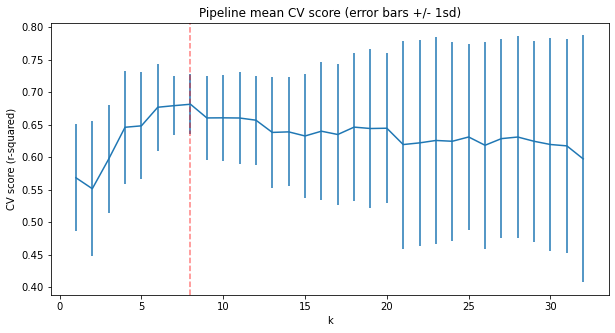

In [545]:
#Code task 20#
#Assign the value of k from the above dict of `best_params_` and assign it to `best_k`

#so best_k will hold the value above we just saw: lr_grid_cv.best_params_ >> {'selectkbest__k': 8}
best_k = lr_grid_cv.best_params_['selectkbest__k'] #why do we need to write out ['selectkbest__k']? don't we already get
#that when we call just the first part before that?
#ohhh wait ok i get it. we want JUST the number (8), so we call it on this end so it returns JUST a/the number!


#setting up / staging all the graphing/plotting elements

plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k, score_mean, yerr=score_std)
plt.axvline(x=best_k, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('CV score (r-squared)')
plt.title('Pipeline mean CV score (error bars +/- 1sd)');

In [ ]:
#oh wow very cool! so it tells us / shows us which is our optimal k - the one w/ the lowest cv score / aka r2
#but wait...... isn't the HIGHER the r2 score the BETTER!?! cuz that's telling how much your variance improved/decreased....
#oh wait wow nevermind - yes that's exactly right - I was looking at the size / height of the ERROR BARS and not the
#height of the point on the line. so yes this makes perfect sense. @k=8 the mean cv'd r2 square is highest and also
#the error is smallest? i thought maybe those would be correlated but not necessarily? i mean maybe the highest r2 also
#has the lowest error (like mae), but if you look, you can clearly see that the lowest values don't necessarily have
#the least error. it seems more like, the more features you try to use/the higher the k, the more the error! although
#it seems to get lower until you hit 8 which is again the sweet spot and then climbs back up

#also, as noted below, although the error seems to increase by alot, the r2 doesn't seem to go down by too much after
#k=8, but it is a rapid ascent to it

#ohh ok, so i think i understand the syntax now. the error bar represents the STANDARD DEVIATION of the cv scores @
#that k number

The above suggests a good value for k is 8. There was an initial rapid increase with k, followed by a slow decline. Also noticeable is the variance of the results greatly increase above k=8. As you increasingly overfit, expect greater swings in performance as different points move in and out of the train/test folds.

In [ ]:
#ahh okay, yeah makes alot of sense! if you get too specific / custom, your cv scores when you randomize w/ each sample
#are gonna swing ALOT due to the presence and absence of certain members!

Which features were most useful? Step into your best model, shown below. Starting with the fitted grid search object, you get the best estimator, then the named step 'selectkbest', for which you can call its `get_support()` method for a logical mask of the features selected.

In [546]:
#so what does this mean? so lr_grid_cv is the big package function we packed w/ features & methods
#best_estimator - not sure what that is? we haven't used that yet? we've seen best_PARAMS

#why do we gotta specify "named_steps"? why can't we just.... name it? to get to it

selected = lr_grid_cv.best_estimator_.named_steps.selectkbest.get_support()

In [547]:
selected

array([False,  True, False,  True, False,  True, False, False, False,
       False,  True,  True, False,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [548]:
#ok so there's 32 so this is one for each column.... but what is it true/falsing?
#ohhh - like whether it's one of the best / k true falsers??
#well then this should sum up to 8!!
selected.sum()

8

In [ ]:
#yess!! sensational!

Similarly, instead of using the 'selectkbest' named step, you can access the named step for the linear regression model and, from that, grab the model coefficients via its `coef_` attribute:

In [ ]:
#oh so this would be like the equivalent of the 'components_' method for PCA! so this way we can see the ranks of the
#features for each PC!?

In [549]:
#Code task 21#
#Get the linear model coefficients from the `coef_` attribute and store in `coefs`,
#get the matching feature names from the column names of the dataframe,
#and display the results as a pandas Series with `coefs` as the values and `features` as the index,
#sorting the values in descending order

#so remember, this is the alternative to what we just did, except this will show us actual SCORES / relative standings
#and magnitude
coefs = lr_grid_cv.best_estimator_.named_steps.linearregression.coef_
features = X_train.columns[selected]

#ahh okay, i get it, yeah just exactly like what we did w/ pca.components_
#turn it into a table by tacking/slapping on the column labels
#cuz it doesn't rank the coeffs any particular way. just lays it out like a matrix
#so it should be 32x32 right? cuz 32 components (rows) with 32 features each (across/columns)

#oh wait, no. apparently not. i guess it just sums it up and like OVERALL, these are like the weights/scores/loadings?

#like if you JUST chose the first principle component, these would be the coefficients of each feature in the equation
#to predict y


pd.Series(coefs, index=features).sort_values(ascending=False)

vertical_drop        10.767857
Snow Making_ac        6.290074
total_chairs          5.794156
fastQuads             5.745626
Runs                  5.370555
LongestRun_mi         0.181814
trams                -4.142024
SkiableTerrain_ac    -5.249780
dtype: float64

In [ ]:
#very interesting - so this does line up pretty closely with using simple correlation coefficients that we did in eda:
#in order it was:

#runs
#fastquads
#vertical drop
#snow making acres
#total chairs
#days open
#longest run
#trams

In [ ]:
#and this is addressing something different than PCA because w/ PCA we weren't looking at price! we were seeing how
#other factors were related to each other. but here, we're seeing how MANY factors are all correlated to SPECIFICALLY
#PRICE!!!

<AxesSubplot:xlabel='vertical_drop', ylabel='AdultWeekend'>

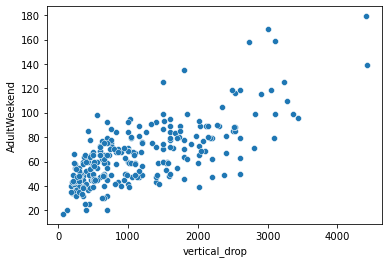

In [553]:
#wow so interesting! so vertical_drop is the think most closely tied to price??
#so, as in, the price should be proportional to the vertical drop?

sns.scatterplot(data=ski_data, x='vertical_drop', y='AdultWeekend')

In [556]:
#wow. look at that. there you have it. a very clear link. let's see the number:
ski_data.vertical_drop.corr(ski_data.AdultWeekend)

0.7130674701666047

In [ ]:
#prit-tee strong

These results suggest that vertical drop is your biggest positive feature. This makes intuitive sense and is consistent with what you saw during the EDA work. Also, you see the area covered by snow making equipment is a strong positive as well. People like guaranteed skiing! The skiable terrain area is negatively associated with ticket price! This seems odd. People will pay less for larger resorts? There could be all manner of reasons for this. It could be  an effect whereby larger resorts can host more visitors at any one time and so can charge less per ticket. As has been mentioned previously, the data are missing information about visitor numbers. Bear in mind,  the coefficient for skiable terrain is negative _for this model_. For example, if you kept the total number of chairs and fastQuads constant, but increased the skiable terrain extent, you might imagine the resort is worse off because the chairlift capacity is stretched thinner.

In [ ]:
#interesting - so you never know which way these things can go till you see the data, you can only conjecture
#cuz like w/ supply, demand and price, there's always different possibilities that can explain a situation
#like could be that price is low when demand is low or maybe demand is high but competition/supply is high too

#so in the case of skiable acres, that's negatively correlated w/ price. on the outset, you might've thought that
#parks with more land could/would charge more for a ticket because they're offering so much space. but in reality,
#BECAUSE they're so open, there's not as much scarcity, thus they can't really charge more because there's not really
#a 'competition' of ppl tryna get in. that's why companies/industry create 'artificial'/'planned' scarcity of supply
#so that they can drive their own prices up. pretend there's no resources, but really they're purposely holding out so
#they can charge more and make ppl fight/compete for / bid for stuff and give stuff only to those willing to pay the
#most / to the highest bidder

#trying to understand what the last bit is saying - if a resort held the number of chairs and fastquads constant,
#but had more skiable terrain, then that might not work so well because it'd be harder for people to reach these areas
#now ppl are gonna be fighting for chairs or there'll be unused/underutilized space

## 4.10 Random Forest Model<a id='4.10_Random_Forest_Model'></a>

A model that can work very well in a lot of cases is the random forest. For regression, this is provided by `sklearn`'s `RandomForestRegressor` class.

Time to stop the bad practice of repeatedly checking performance on the test split. Instead, go straight from defining the pipeline to assessing performance using cross-validation. `cross_validate` will perform the fitting as part of the process. This uses the default settings for the random forest so you'll then proceed to investigate some different hyperparameters.

In [ ]:
#as we've seen w/ these, the common theme/thread is MASH UP AS MANY STEPS AS YOU CAN INTO ONE SUPERPACKAGE!
#hashtagefficiency #bangforyourbuck

In [ ]:
#hyperparameters?

### 4.10.1 Define the pipeline<a id='4.10.1_Define_the_pipeline'></a>

In [557]:
#Code task 22#
#Define a pipeline comprising the steps:
#SimpleImputer() with a strategy of 'median'
#StandardScaler(),
#and then RandomForestRegressor() with a random state of 47
RF_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    RandomForestRegressor(random_state=47)
)

### 4.10.2 Fit and assess performance using cross-validation<a id='4.10.2_Fit_and_assess_performance_using_cross-validation'></a>

In [558]:
#Code task 23#
#Call `cross_validate` to estimate the pipeline's performance.
#Pass it the random forest pipe object, `X_train` and `y_train`,
#and get it to use 5-fold cross-validation
rf_default_cv_results = cross_validate(RF_pipe, X_train, y_train, cv=5)

In [559]:
rf_cv_scores = rf_default_cv_results['test_score']
rf_cv_scores

array([0.69191298, 0.79690531, 0.77223724, 0.62285391, 0.62203146])

In [ ]:
# very close to template

In [560]:
np.mean(rf_cv_scores), np.std(rf_cv_scores)

(0.7011881818042583, 0.07307230846782668)

In [ ]:
# so what exactly is random forest anyway??

### 4.10.3 Hyperparameter search using GridSearchCV<a id='4.10.3_Hyperparameter_search_using_GridSearchCV'></a>

Random forest has a number of hyperparameters that can be explored, however here you'll limit yourselves to exploring some different values for the number of trees. You'll try it with and without feature scaling, and try both the mean and median as strategies for imputing missing values.

In [561]:
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
grid_params = {
        'randomforestregressor__n_estimators': n_est,
        'standardscaler': [StandardScaler(), None],
        'simpleimputer__strategy': ['mean', 'median']
}
grid_params

{'randomforestregressor__n_estimators': [10,
  12,
  16,
  20,
  26,
  33,
  42,
  54,
  69,
  88,
  112,
  143,
  183,
  233,
  297,
  379,
  483,
  615,
  784,
  1000],
 'standardscaler': [StandardScaler(), None],
 'simpleimputer__strategy': ['mean', 'median']}

In [ ]:
# hain? what does this mean? i mean i see that we chose 20 numbers

In [562]:
#Code task 24#
#Call `GridSearchCV` with the random forest pipeline, passing in the above `grid_params`
#dict for parameters to evaluate, 5-fold cross-validation, and all available CPU cores (if desired)
rf_grid_cv = GridSearchCV(RF_pipe, param_grid=grid_params, cv=5, n_jobs=-1)

#what is it about the number of cpu cores to use? and what's n_jobs & -1?

In [ ]:
#we made the GridSearchCV thing/pipeline/superpackage into an object and can now call on that to fit it w/ this
#/the specific data that we want

In [564]:
#Code task 25#
#Now call the `GridSearchCV`'s `fit()` method with `X_train` and `y_train` as arguments
#to actually start the grid search. This may take a minute or two.
rf_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=47))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__n_estimators': [10, 12, 16, 20,
                                                                 26, 33, 42, 54,
                                                                 69, 88, 112,
                                                                 143, 183, 233,
                                                                 297, 379, 483,
                                                                 615, 784,
                                                                 1000],
                         'simpleimputer__strategy': [

In [568]:
#Code task 26#
#Print the best params (`best_params_` attribute) from the grid search
rf_grid_cv.best_params_

{'randomforestregressor__n_estimators': 69,
 'simpleimputer__strategy': 'median',
 'standardscaler': None}

In [ ]:
#okay so what is n_estimators / that list of 20 nums? and so it's saying 69 is the best?

#okay so apparently n_estimators is the number of 'trees' in the forest... not sure what that means, will have to
#research/learn this stuff later

It looks like imputing with the median helps, but scaling the features doesn't.

In [569]:
rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, cv=5)
rf_best_scores = rf_best_cv_results['test_score']
rf_best_scores

array([0.6942912 , 0.81397046, 0.76794965, 0.62252004, 0.66927054])

In [570]:
np.mean(rf_best_scores), np.std(rf_best_scores)

(0.7136003801154928, 0.06879186526027767)

You've marginally improved upon the default CV results. Random forest has many more hyperparameters you could tune, but we won't dive into that here.

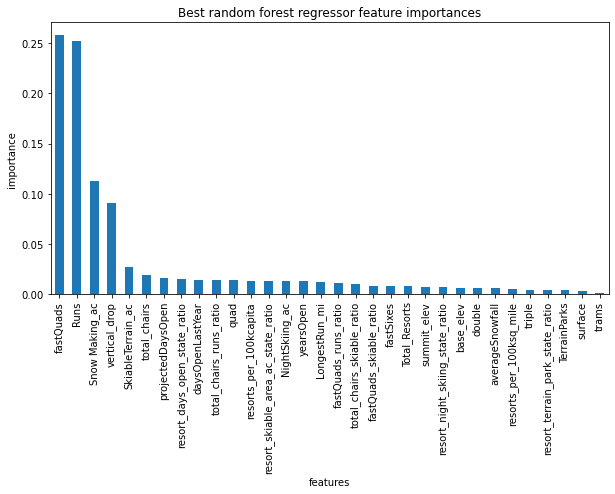

In [573]:
#Code task 27#
#Plot a barplot of the random forest's feature importances,
#assigning the `feature_importances_` attribute of 
#`rf_grid_cv.best_estimator_.named_steps.randomforestregressor` to the name `imps` to then
#create a pandas Series object of the feature importances, with the index given by the
#training data column names, sorting the values in descending order
plt.subplots(figsize=(10, 5))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');

In [ ]:
#dope mashaAllah. this is pretty close too to the eda corrs:

#runs
#fastquads
#vertical drop
#snow making ac
#total chairs
#days open
#longest run
#trams

Encouragingly, the dominant top four features are in common with your linear model:
* fastQuads
* Runs
* Snow Making_ac
* vertical_drop

In [ ]:
#linear model meaning the above, (linear regression?), not eda

## 4.11 Final Model Selection<a id='4.11_Final_Model_Selection'></a>

Time to select your final model to use for further business modeling! It would be good to revisit the above model selection; there is undoubtedly more that could be done to explore possible hyperparameters.
It would also be worthwhile to investigate removing the least useful features. Gathering or calculating, and storing, features adds business cost and dependencies, so if features genuinely are not needed they should be removed.
Building a simpler model with fewer features can also have the advantage of being easier to sell (and/or explain) to stakeholders.
Certainly there seem to be four strong features here and so a model using only those would probably work well.
However, you want to explore some different scenarios where other features vary so keep the fuller 
model for now. 
The business is waiting for this model and you have something that you have confidence in to be much better than guessing with the average price.

Or, rather, you have two "somethings". You built a best linear model and a best random forest model. You need to finally choose between them. You can calculate the mean absolute error using cross-validation. Although `cross-validate` defaults to the $R^2$ [metric for scoring](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring) regression, you can specify the mean absolute error as an alternative via
the `scoring` parameter.

In [ ]:
#aaaaaammmmmeeeeeeeennn to using fewer features / making a simpler model

### 4.11.1 Linear regression model performance<a id='4.11.1_Linear_regression_model_performance'></a>

In [574]:
# 'neg_mean_absolute_error' uses the (negative of) the mean absolute error    (why???)
lr_neg_mae = cross_validate(lr_grid_cv.best_estimator_, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [575]:
lr_mae_mean = np.mean(-1 * lr_neg_mae['test_score'])     #ummm why not just use the regular/non-negative abso valu
lr_mae_std = np.std(-1 * lr_neg_mae['test_score'])       #if you were just gonna make it all positive anyway / mult
lr_mae_mean, lr_mae_std                                  #by -1???

(10.499032338015297, 1.622060897679967)

In [576]:
mean_absolute_error(y_test, lr_grid_cv.best_estimator_.predict(X_test))

14.107697966436229

### 4.11.2 Random forest regression model performance<a id='4.11.2_Random_forest_regression_model_performance'></a>

In [577]:
rf_neg_mae = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [578]:
rf_mae_mean = np.mean(-1 * rf_neg_mae['test_score'])
rf_mae_std = np.std(-1 * rf_neg_mae['test_score'])
rf_mae_mean, rf_mae_std

(9.584402569970075, 1.372248205815679)

In [579]:
mean_absolute_error(y_test, rf_grid_cv.best_estimator_.predict(X_test))

9.536509516326177

### 4.11.3 Conclusion<a id='4.11.3_Conclusion'></a>

The random forest model has a lower cross-validation mean absolute error by almost \\$1. It also exhibits less variability. Verifying performance on the test set produces performance consistent with the cross-validation results.

In [ ]:
#ohh i see, that's what the point of was of the last line in each of the last two blocks - testing it on the test to
#see how it fared compared to on the train

## 4.12 Data quantity assessment<a id='4.12_Data_quantity_assessment'></a>

Finally, you need to advise the business whether it needs to undertake further data collection. Would more data be useful? We're often led to believe more data is always good, but gathering data invariably has a cost associated with it. Assess this trade off by seeing how performance varies with differing data set sizes. The `learning_curve` function does this conveniently.

In [580]:
#so this is gonna tell us how performane aka r2 changes w/ differing sample sizes? so like see where the point of
#diminishing returns is?

fractions = [.2, .25, .3, .35, .4, .45, .5, .6, .75, .8, 1.0]
train_size, train_scores, test_scores = learning_curve(pipe, X_train, y_train, train_sizes=fractions)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

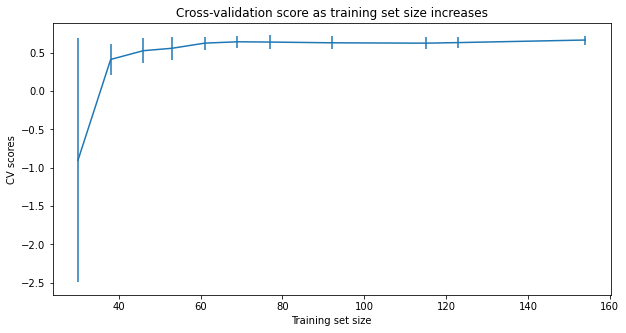

In [581]:
#so this is gonna let us see if the test scores went up w/ more training or not!

plt.subplots(figsize=(10, 5))
plt.errorbar(train_size, test_scores_mean, yerr=test_scores_std)
plt.xlabel('Training set size')
plt.ylabel('CV scores')
plt.title('Cross-validation score as training set size increases');

In [ ]:
#EXACTLY! there you have it - ***SHARPLY*** DIMINISHING RETURNS!! AFTER 40 SAMPLES IT DOESN'T MATTER! so yeah we got
#more than enough

This shows that you seem to have plenty of data. There's an initial rapid improvement in model scores as one would expect, but it's essentially levelled off by around a sample size of 40-50.

## 4.13 Save best model object from pipeline<a id='4.13_Save_best_model_object_from_pipeline'></a>

In [582]:
#Code task 28#
#This may not be "production grade ML deployment" practice, but adding some basic
#information to your saved models can save your bacon in development.
#Just what version model have you just loaded to reuse? What version of `sklearn`
#created it? When did you make it?
#Assign the pandas version number (`pd.__version__`) to the `pandas_version` attribute,
#the numpy version (`np.__version__`) to the `numpy_version` attribute,
#the sklearn version (`sklearn_version`) to the `sklearn_version` attribute,
#and the current datetime (`datetime.datetime.now()`) to the `build_datetime` attribute
#Let's call this model version '1.0'
best_model = rf_grid_cv.best_estimator_
best_model.version = 1.0 #this is the thing they're saying to just call 1.0 right
best_model.pandas_version = 'pd.__version__'
best_model.numpy_version = 'np.__version__'
best_model.sklearn_version = 'sklearn_version'
best_model.X_columns = [col for col in X_train.columns] #is this not the same thing as just saying X_train.columns alone?
best_model.build_datetime = datetime.datetime.now()

In [583]:
# save the model

modelpath = '../models'   #ohhh cool! didn't know you could do that. that's how you create a new file to your directory
save_file(best_model, 'ski_resort_pricing_model.pkl', modelpath)

Directory ../models was created.
Writing file.  "../models/ski_resort_pricing_model.pkl"


## 4.14 Summary<a id='4.14_Summary'></a>

**Q: 1** Write a summary of the work in this notebook. Capture the fact that you gained a baseline idea of performance by simply taking the average price and how well that did. Then highlight that you built a linear model and the features that found. Comment on the estimate of its performance from cross-validation and whether its performance on the test split was consistent with this estimate. Also highlight that a random forest regressor was tried, what preprocessing steps were found to be best, and again what its estimated performance via cross-validation was and whether its performance on the test set was consistent with that. State which model you have decided to use going forwards and why. This summary should provide a quick overview for someone wanting to know quickly why the given model was chosen for the next part of the business problem to help guide important business decisions.

**A: 1** Your answer here